### 1.1 Import the monthly and annual data and join**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams.update({'font.size': 16})
import seaborn as sns

**Importing annual data and joining**

In [2]:
annual_features = pd.read_excel('annual_features.xlsx')
annual_features

,customer_id,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_mean_2011,ann_txn_amt_mean_2012,ann_txn_amt_mean_2013,ann_txn_amt_mean_2014,...,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015
0,CS1112,96,81,105,90,39,70.666667,67.400000,70.666667,70.666667,...,485.333333,161.800000,1190.333333,284.333333,0.000000,3,5,3,3,1
1,CS1113,94,95,97,97,98,81.333333,74.800000,85.200000,56.500000,...,444.333333,290.200000,171.200000,781.666667,745.333333,3,5,5,4,3
2,CS1114,97,97,105,95,79,85.200000,75.000000,70.400000,70.833333,...,94.700000,968.000000,619.300000,726.166667,0.000000,5,2,5,6,1
3,CS1115,102,104,94,98,55,87.000000,67.571429,79.571429,78.250000,...,225.000000,477.285714,110.952381,512.250000,0.000000,3,7,7,4,1
4,CS1116,87,105,59,96,0,58.750000,76.666667,59.000000,66.600000,...,449.583333,908.333333,0.000000,636.800000,0.000000,4,3,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS8996,38,38,50,79,0,31.000000,33.666667,41.500000,56.000000,...,98.000000,20.333333,144.500000,481.600000,0.000000,2,3,2,6,0
6885,CS8997,47,49,75,45,0,45.000000,39.500000,35.166667,42.000000,...,8.000000,45.666667,441.366667,18.000000,0.000000,2,4,6,2,0
6886,CS8998,69,79,75,49,0,64.000000,54.400000,47.000000,32.500000,...,50.000000,505.300000,1568.000000,219.666667,0.000000,2,5,2,4,0
6887,CS8999,64,30,39,24,0,52.000000,25.250000,28.000000,21.000000,...,333.000000,21.583333,103.000000,18.000000,0.000000,3,4,3,2,0


In [3]:
annual_day_of_week_counts_pivot = pd.read_excel('annual_day_of_week_counts_pivot.xlsx')
annual_day_of_week_counts_pivot

,customer_id,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,CS1112,1,0,0,1,0,0,1,0,0,...,1,1,1,0,0,0,0,0,0,1
1,CS1113,1,1,0,1,0,0,0,2,1,...,0,3,0,0,2,0,0,0,0,1
2,CS1114,0,1,0,1,1,0,2,0,0,...,0,1,1,0,0,0,0,1,0,0
3,CS1115,0,0,1,1,0,0,1,1,1,...,2,0,2,0,0,0,0,1,0,0
4,CS1116,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS8996,0,1,0,0,0,1,0,0,0,...,1,1,2,0,0,0,0,0,0,0
6885,CS8997,0,0,0,0,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
6886,CS8998,0,0,0,0,0,1,1,2,0,...,0,1,1,0,0,0,0,0,0,0
6887,CS8999,0,1,1,0,0,1,0,1,0,...,0,0,2,0,0,0,0,0,0,0


In [4]:
Retail_Data_Response = pd.read_csv('Retail_Data_Response.csv')
Retail_Data_Response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [5]:
missing_values = set(annual_features.iloc[:, 0]).symmetric_difference(set(Retail_Data_Response.iloc[:, 0]))
missing_values

{'CS7297', 'CS7413', 'CS7638', 'CS8376', 'CS8753'}

In [6]:
merged_df = pd.merge(annual_features, annual_day_of_week_counts_pivot, on=['customer_id'])
merged_df

,customer_id,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_mean_2011,ann_txn_amt_mean_2012,ann_txn_amt_mean_2013,ann_txn_amt_mean_2014,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,CS1112,96,81,105,90,39,70.666667,67.400000,70.666667,70.666667,...,1,1,1,0,0,0,0,0,0,1
1,CS1113,94,95,97,97,98,81.333333,74.800000,85.200000,56.500000,...,0,3,0,0,2,0,0,0,0,1
2,CS1114,97,97,105,95,79,85.200000,75.000000,70.400000,70.833333,...,0,1,1,0,0,0,0,1,0,0
3,CS1115,102,104,94,98,55,87.000000,67.571429,79.571429,78.250000,...,2,0,2,0,0,0,0,1,0,0
4,CS1116,87,105,59,96,0,58.750000,76.666667,59.000000,66.600000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS8996,38,38,50,79,0,31.000000,33.666667,41.500000,56.000000,...,1,1,2,0,0,0,0,0,0,0
6885,CS8997,47,49,75,45,0,45.000000,39.500000,35.166667,42.000000,...,0,0,0,0,0,0,0,0,0,0
6886,CS8998,69,79,75,49,0,64.000000,54.400000,47.000000,32.500000,...,0,1,1,0,0,0,0,0,0,0
6887,CS8999,64,30,39,24,0,52.000000,25.250000,28.000000,21.000000,...,0,0,2,0,0,0,0,0,0,0


In [7]:
annual_feature_outputs = pd.merge(merged_df, Retail_Data_Response, on=['customer_id'])
annual_feature_outputs

,customer_id,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_mean_2011,ann_txn_amt_mean_2012,ann_txn_amt_mean_2013,ann_txn_amt_mean_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,96,81,105,90,39,70.666667,67.400000,70.666667,70.666667,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,94,95,97,97,98,81.333333,74.800000,85.200000,56.500000,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,97,97,105,95,79,85.200000,75.000000,70.400000,70.833333,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,102,104,94,98,55,87.000000,67.571429,79.571429,78.250000,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,87,105,59,96,0,58.750000,76.666667,59.000000,66.600000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,CS8996,38,38,50,79,0,31.000000,33.666667,41.500000,56.000000,...,1,2,0,0,0,0,0,0,0,0
6880,CS8997,47,49,75,45,0,45.000000,39.500000,35.166667,42.000000,...,0,0,0,0,0,0,0,0,0,0
6881,CS8998,69,79,75,49,0,64.000000,54.400000,47.000000,32.500000,...,1,1,0,0,0,0,0,0,0,0
6882,CS8999,64,30,39,24,0,52.000000,25.250000,28.000000,21.000000,...,0,2,0,0,0,0,0,0,0,0


**Importing monthly data and joining**

In [8]:
mth_rolling_features = pd.read_excel('mth_rolling_features.xlsx')
mth_rolling_features

,Unnamed: 0,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,0,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,323778,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323779,323779,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323780,323780,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
323781,323781,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,...,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


In [9]:
mth_rolling_features.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
mth_rolling_features

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323779,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323780,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
323781,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


In [10]:
mth_day_counts = pd.read_excel('mth_day_counts.xlsx')
mth_day_counts

,Index,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,0,CS1112,2011-05-31,0,0,0,0,0,0,0
1,1,CS1112,2011-06-30,0,0,0,0,0,0,1
2,2,CS1112,2011-07-31,0,0,0,0,0,0,0
3,3,CS1112,2011-08-31,1,0,0,0,0,0,0
4,4,CS1112,2011-09-30,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
323778,323778,CS9000,2014-11-30,0,0,0,0,0,0,0
323779,323779,CS9000,2014-12-31,0,0,0,0,0,0,0
323780,323780,CS9000,2015-01-31,0,0,0,0,0,0,0
323781,323781,CS9000,2015-02-28,0,0,1,0,0,0,0


In [11]:
mth_day_counts.drop(columns=['Index'],axis=1,inplace=True)
mth_day_counts

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS1112,2011-05-31,0,0,0,0,0,0,0
1,CS1112,2011-06-30,0,0,0,0,0,0,1
2,CS1112,2011-07-31,0,0,0,0,0,0,0
3,CS1112,2011-08-31,1,0,0,0,0,0,0
4,CS1112,2011-09-30,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0,0,0,0,0,0,0
323779,CS9000,2014-12-31,0,0,0,0,0,0,0
323780,CS9000,2015-01-31,0,0,0,0,0,0,0
323781,CS9000,2015-02-28,0,0,1,0,0,0,0


In [12]:
days_since_last_txn = pd.read_excel('days_since_last_txn.xlsx')
days_since_last_txn

,Index,CLNT_NO,ME_DT,days_since_last_txn
0,0,CS1112,2011-05-31,51
1,1,CS1112,2011-06-30,15
2,2,CS1112,2011-07-31,46
3,3,CS1112,2011-08-31,12
4,4,CS1112,2011-09-30,42
...,...,...,...,...
323778,323778,CS9000,2014-11-30,98
323779,323779,CS9000,2014-12-31,129
323780,323780,CS9000,2015-01-31,160
323781,323781,CS9000,2015-02-28,0


In [13]:
days_since_last_txn.drop(columns=['Index'],axis=1,inplace=True)
days_since_last_txn

,CLNT_NO,ME_DT,days_since_last_txn
0,CS1112,2011-05-31,51
1,CS1112,2011-06-30,15
2,CS1112,2011-07-31,46
3,CS1112,2011-08-31,12
4,CS1112,2011-09-30,42
...,...,...,...
323778,CS9000,2014-11-30,98
323779,CS9000,2014-12-31,129
323780,CS9000,2015-01-31,160
323781,CS9000,2015-02-28,0


In [14]:
df_1 = pd.merge(mth_rolling_features, mth_day_counts, on=['CLNT_NO','ME_DT'])
df_1

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,1
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,1,0,0,0,0,0,0
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,4.0,0.333333,1.0,0,0,0,0,0,0,0
323779,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,4.0,0.333333,1.0,0,0,0,0,0,0,0
323780,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,3.0,0.250000,1.0,0,0,0,0,0,0,0
323781,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,4.0,0.333333,1.0,0,0,1,0,0,0,0


In [15]:
df_2 = pd.merge(df_1, days_since_last_txn, on=['CLNT_NO','ME_DT'])
df_2

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_mean_12M,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn
0,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,51
1,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,1,15
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,0,0,0,0,0,0,0,46
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,1,0,0,0,0,0,0,12
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,0,0,0,0,0,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.333333,1.0,0,0,0,0,0,0,0,98
323779,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.333333,1.0,0,0,0,0,0,0,0,129
323780,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.250000,1.0,0,0,0,0,0,0,0,160
323781,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,0.333333,1.0,0,0,1,0,0,0,0,0


In [16]:
Retail_Data_Response=Retail_Data_Response.rename(columns={'customer_id':'CLNT_NO'})
Retail_Data_Response

,CLNT_NO,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [17]:
monthly_features_outputs = pd.merge(df_2, Retail_Data_Response, on=['CLNT_NO'])
monthly_features_outputs

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,51,0
1,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,1,15,0
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,0,0,0,0,0,0,0,46,0
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,1,0,0,0,0,0,0,12,0
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,0,0,0,0,0,0,0,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,98,0
323544,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,129,0
323545,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,160,0
323546,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,1.0,0,0,1,0,0,0,0,0,0


In [18]:
monthly_features_outputs = monthly_features_outputs.apply(lambda x: x.fillna(0),axis=0)
monthly_features_outputs

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,CS1112,2011-05-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,0,51,0
1,CS1112,2011-06-30,56,1,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,1,15,0
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,0.0,0,0,0,0,0,0,0,46,0
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,0.0,1,0,0,0,0,0,0,12,0
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,0.0,0,0,0,0,0,0,0,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,98,0
323544,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,129,0
323545,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,160,0
323546,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,1.0,0,0,1,0,0,0,0,0,0


# 1.2 Steps for each method

## Logistic Regression with L1 regularization for Annual features output

**1. Separate the inputs X and the output y in two data frames.**

In [19]:
X = annual_feature_outputs.drop(['response','customer_id'],axis=1)
y = annual_feature_outputs['response']

**2. Split the data in train and test set. Use a test size value of 2/3 and set the random state
equal to 1147 for consistency (i.e. the course code value). Use the following names for
consistency.**

In [20]:
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X, y, test_size=2/3, random_state=1147)
X_test_annual.shape

(4590, 75)

**3. Pre-process**

In [21]:
scaler = StandardScaler()
X_train_annual_scaled = scaler.fit_transform(X_train_annual)
X_train_annual_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [22]:
X_test_annual_scaled = scaler.transform(X_test_annual)

**4. Fit the training dataset and optimize the hyperparameters of the method.**

In [23]:
C = [10, 1, .1, 0.01, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train_annual_scaled, y_train_annual)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_annual_scaled, y_train_annual))
    print('Test accuracy:', clf.score(X_test_annual_scaled, y_test_annual))
    print('')

C: 10
Coefficient of each feature: [[-0.7963569  -0.97346122 -0.31287797 -0.18865357  1.94879242 -0.17200573
   0.51491351 -0.28881928  0.81656125  0.          0.82782039  0.4148703
   0.3036982  -0.29183053 -1.69660048 -0.36740907 -0.07160343  0.50597138
  -0.02292115  0.          0.76938641  1.11404893  0.61987112  0.88425071
   0.34970426  0.24784727 -0.55569646  1.17301438 -0.21542301  0.09930289
   0.26158277 -0.2874861  -0.95026041 -0.84237921 -0.82392298 -0.05546548
   0.64748511 -0.34610544  0.71091291 -0.56067435  0.13025492 -0.03518159
   0.         -0.00736287 -0.01471537 -0.09650207  0.03807227  0.02933839
   0.10875596  0.03657917 -0.05514068 -0.16846881  0.07775861  0.
  -0.11063136 -0.01210958 -0.02559936  0.06512575  0.05409869  0.
  -0.04541747 -0.11256271 -0.03540859  0.          0.07931093  0.0497467
   0.04831477  0.16145035 -0.21748177  0.06034018 -0.08880373  0.
   0.14995408 -0.17065628 -0.01076611]]
Training accuracy: 0.918918918918919
Test accuracy: 0.896296296

considering C = 0.1 as the best model since more coefficients are zero 

In [24]:
LogReg = LogisticRegression(penalty = 'l1', C=0.1, solver='liblinear', class_weight='balanced')
LogReg.fit(X_train_annual_scaled, y_train_annual)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [25]:
m = LogReg.coef_
m

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.27233444,  0.        ,
         0.13651437,  0.        ,  0.        ,  0.        , -0.14554379,
         0.        ,  0.15310691,  0.07998548,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00176524,  0.02046351,
         0.        ,  0.        ,  0.53359671,  0.02950793,  0.00479459,
         0.07138364,  0.        , -0.23329917,  0.        ,  0.        ,
         0.        ,  0.00571401,  0.        ,  0.58503479,  0.        ,
         0.03622594, -0.03926227,  0.00108611, -0.0302353 ,  0.        ,
        -0.00931555,  0.01941003,  0.00470493,  0.07326472,  0.        ,
        -0.03940472, -0.14187746,  0.01969121,  0.        , -0.08891231,
         0.        ,  0.        ,  0.07671281,  0.04229477, -0.00725832,
         0.        , -0.00509222,  0.        ,  0.01391103,  0.15938334,
         0.05312315,  0.        ,  0.19151001, -0.2

In [26]:
b = LogReg.intercept_
b

array([-0.58239953])

**5. Plot coeffcient values or feature importance.**

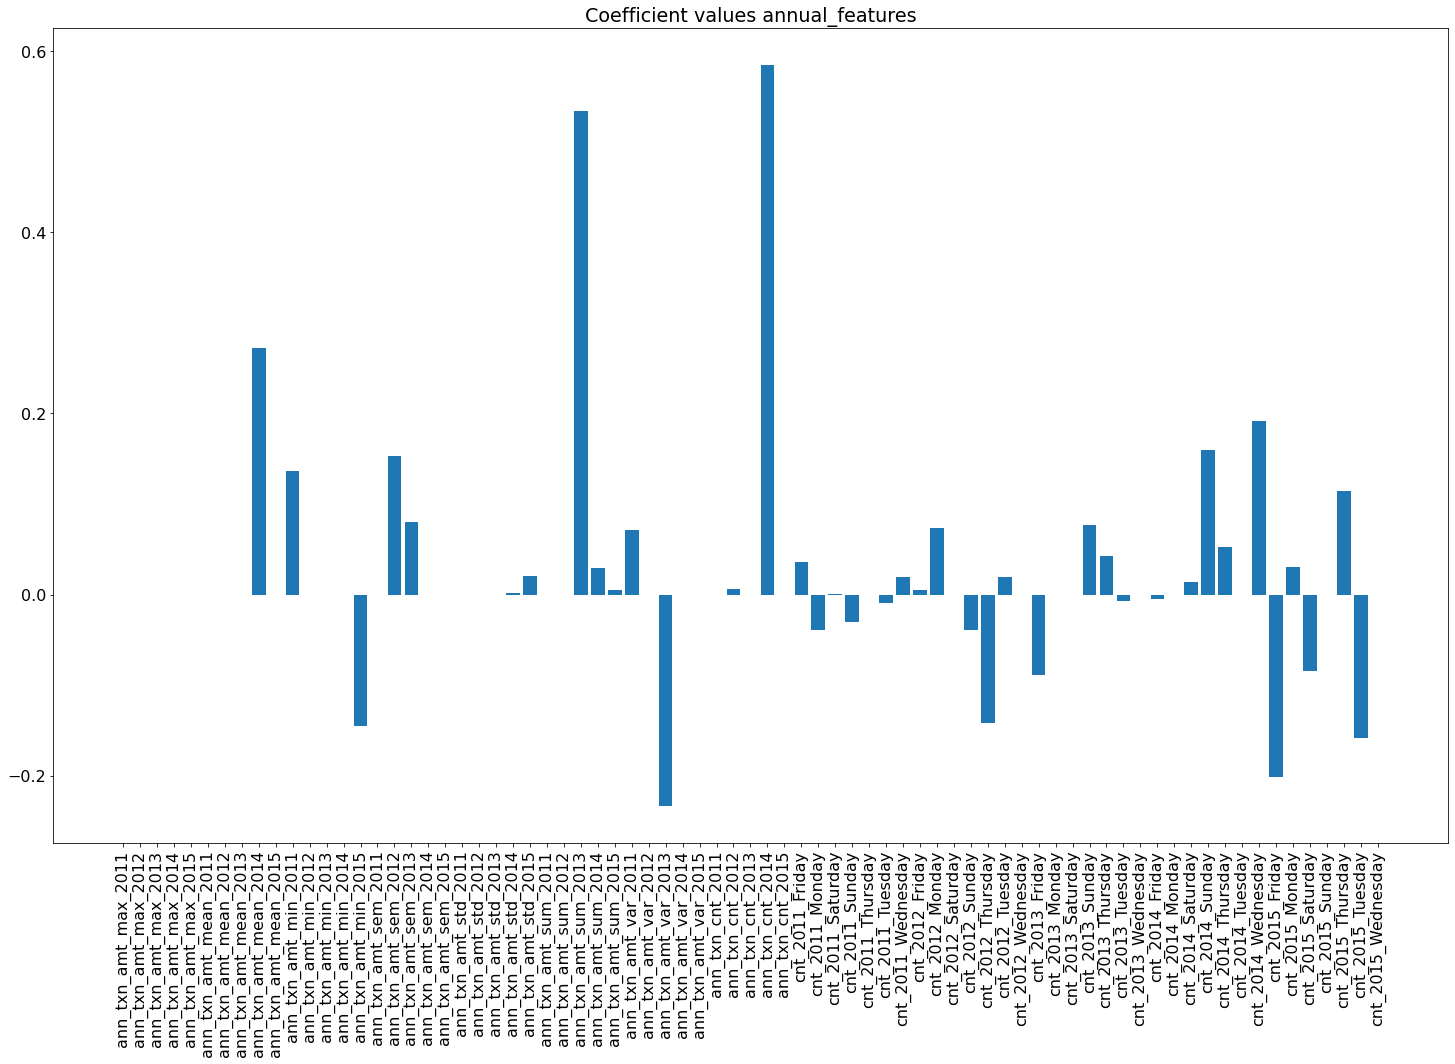

In [27]:
plt.rcParams['figure.figsize'] = (25,15)
# Create plot
plt.figure()
# Create plot title
plt.title("Coefficient values annual_features")
# Add bars
plt.bar(range(X.shape[1]), m[0])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
# Show plot
plt.show()

In [28]:
y_test_annual_predicted = LogReg.predict(X_test_annual_scaled)
y_test_annual_predicted

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [29]:
unique_elements, counts_elements = np.unique(y_test_annual_predicted, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [3114 1476]]


In [30]:
y_test_annual_proba = LogReg.predict_proba(X_test_annual_scaled)
y_test_annual_proba

array([[0.87664969, 0.12335031],
       [0.49176998, 0.50823002],
       [0.45205693, 0.54794307],
       ...,
       [0.56406632, 0.43593368],
       [0.79592138, 0.20407862],
       [0.05291703, 0.94708297]])

**6. Plot probability distribution for test set.**

Text(8.280000000000001, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

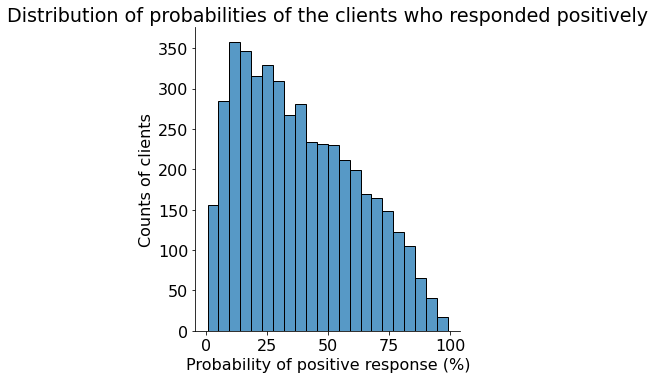

In [31]:
plt.figure(figsize=(5,5))
sns.displot(data = y_test_annual_proba[:,1], x = 100*y_test_annual_proba[:,1])
plt.title('Distribution of probabilities of the clients who responded positively')
plt.xlabel('Probability of positive response (%)')
plt.ylabel('Counts of clients')

**7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.**

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_annual, y_test_annual_predicted)
print(cm)

[[2963 1176]
 [ 151  300]]


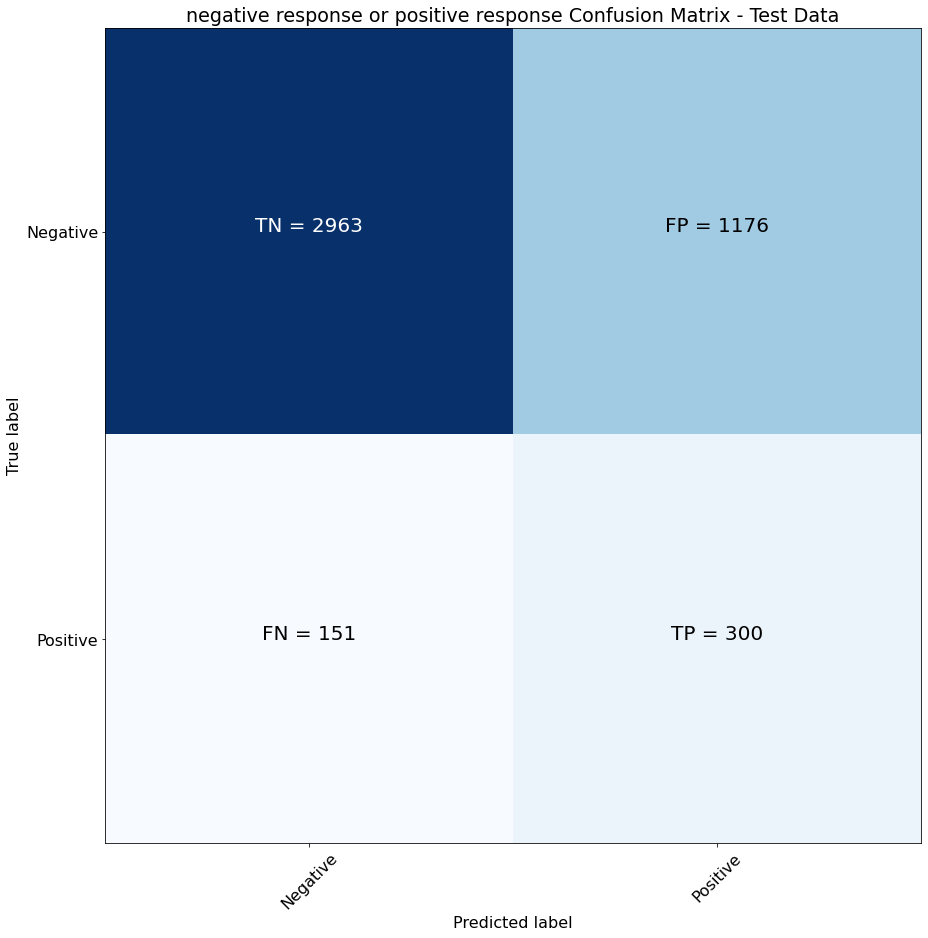

In [33]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('negative response or positive response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test_annual, y_test_annual_predicted, target_names = ['negative response', 'positive response']))

                   precision    recall  f1-score   support

negative response       0.95      0.72      0.82      4139
positive response       0.20      0.67      0.31       451

         accuracy                           0.71      4590
        macro avg       0.58      0.69      0.56      4590
     weighted avg       0.88      0.71      0.77      4590



In [35]:
accuracy_score(y_test_annual, y_test_annual_predicted, normalize = True) # Change normalize = True/False as well. DIAGONAL OVER ALL

0.7108932461873638

### ROC curves of train/test set.

In [36]:
from sklearn.metrics import roc_curve, auc

In [37]:
# Scores for train set
scores_train = LogReg.predict_proba(X_train_annual_scaled)[:, 1]
# Scores for test set
scores_test = LogReg.predict_proba(X_test_annual_scaled)[:, 1]

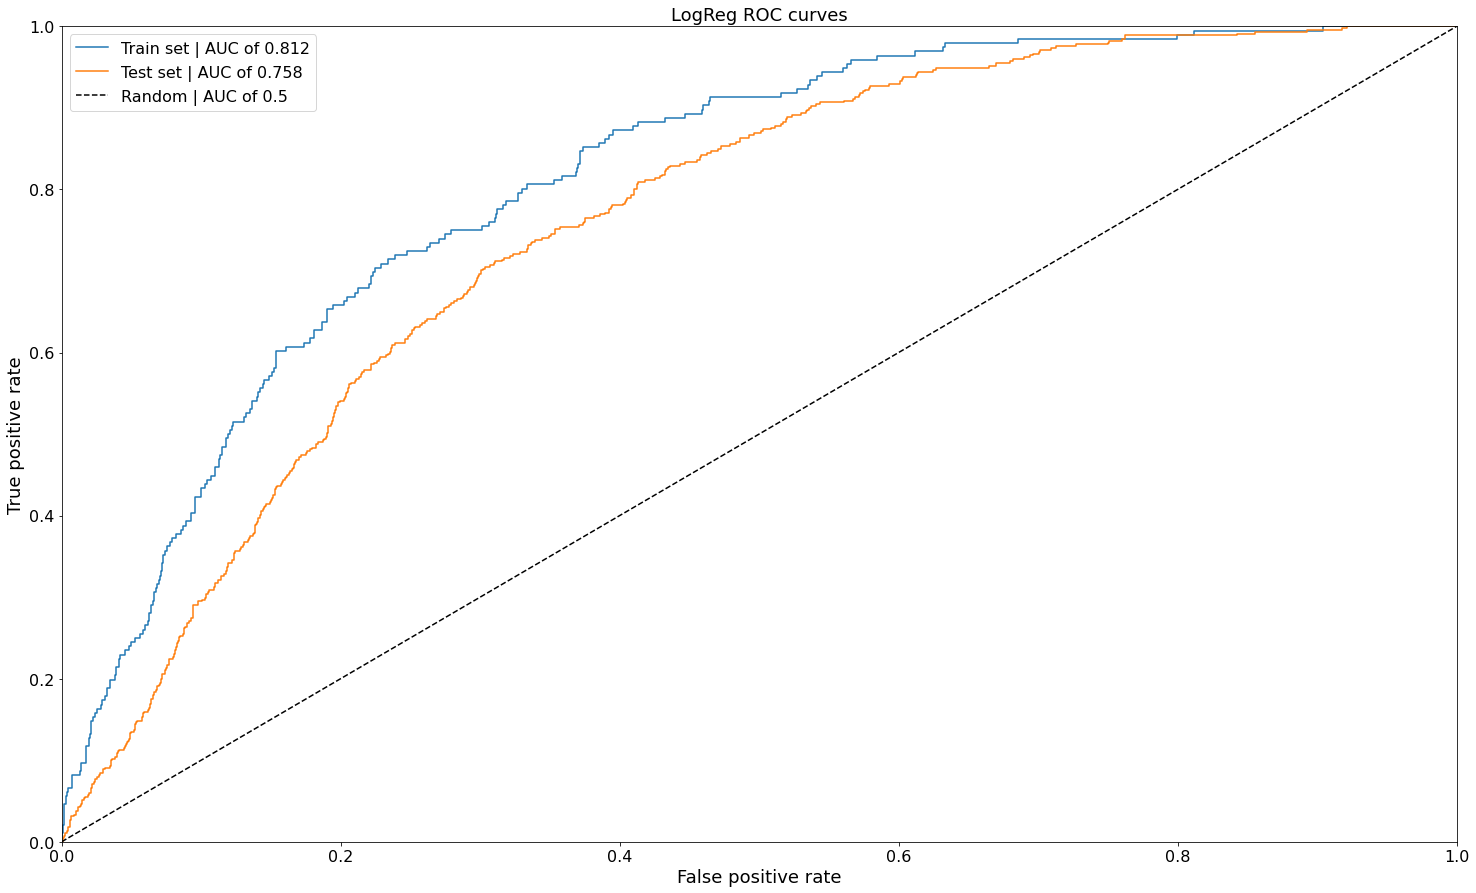

In [38]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('LogReg ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

**8. Plot decision boundary for top 2 features.**

In [39]:
X_train_annual_scaled.min(axis=0)

array([-2.62451989, -3.98248094, -3.81273081, -3.94444066, -1.1129253 ,
       -2.61391544, -3.73702453, -3.5900025 , -3.61445324, -1.11675449,
       -2.07461482, -2.54081912, -2.46405847, -2.47505396, -1.07702539,
       -1.22494443, -1.84005705, -1.7823082 , -1.88082451, -0.46052354,
       -1.33025702, -2.19906981, -2.15491027, -2.29598945, -0.46662873,
       -1.42295288, -1.71721114, -1.6977425 , -1.75526672, -0.86795057,
       -0.93382942, -1.38230383, -1.34791836, -1.40439467, -0.35858267,
       -1.62217542, -2.04313354, -2.00209179, -2.08703671, -0.96540067,
       -0.66190652, -0.64481138, -0.64141494, -0.63805238, -0.66472098,
       -0.63906543, -0.66357433, -0.78487981, -0.81001246, -0.81144763,
       -0.80983736, -0.78842608, -0.8276135 , -0.82312637, -0.8304599 ,
       -0.78152086, -0.84390798, -0.8042294 , -0.80672534, -0.82777769,
       -0.79603386, -0.7938665 , -0.81530061, -0.77471063, -0.83701202,
       -0.84634522, -0.84311099, -0.8655877 , -0.3855441 , -0.38

In [40]:
X_train_annual_scaled.max(axis=0)

array([1.11665108, 1.06357449, 1.04550882, 1.04423056, 1.62452522,
       2.01564977, 2.54832855, 2.32853231, 2.37365373, 1.86797862,
       2.77748075, 3.79052899, 3.61651645, 3.66578692, 2.07245992,
       3.92358353, 5.15194312, 5.45634823, 5.06914927, 5.44149189,
       3.03565994, 3.45243077, 3.71128793, 3.46350684, 5.02233636,
       4.85491351, 5.32578845, 5.53912437, 3.82466818, 6.40690254,
       5.49310688, 6.1829347 , 6.87106086, 6.02377938, 8.51328015,
       4.3878047 , 4.95884344, 5.13218962, 3.66949389, 4.89857762,
       6.87738617, 5.66306624, 5.56704867, 5.61704228, 3.95143419,
       5.36919722, 5.33539908, 5.35184237, 6.35516206, 3.96152895,
       5.41592301, 6.36509833, 4.07502142, 5.19424743, 5.16034199,
       6.15838439, 5.11645198, 6.69537318, 7.43922983, 6.3878855 ,
       5.07945414, 5.49891078, 5.18694457, 6.3057124 , 5.30536028,
       4.18348882, 4.21335075, 6.2942375 , 7.3726854 , 4.84964941,
       7.83126309, 7.6050914 , 7.86242123, 7.54230352, 7.65238

In [41]:
xx, yy = np.mgrid[-2:8:1.1111, -3:13:1.75] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
grid.shape # Confirm that grid shape is 10x10

(100, 2)

In [42]:
median_inputs = np.ones((100, 75)) * np.median(X_train_annual_scaled, axis=0) 
#pd.DataFrame(median_inputs)

In [43]:
#we replace the 27th and 32nd column with the values of the grid
median_inputs[:,27] = grid[:,0]
median_inputs[:,38] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:13,:12] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 27)|(x.name == 38)  else '' for i in x])

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.190266,0.294652,0.305206,0.284052,0.086339,0.207915,0.193815,0.200782,0.204050,0.133991,-0.041356,-0.068578
1,0.190266,0.294652,0.305206,0.284052,0.086339,0.207915,0.193815,0.200782,0.204050,0.133991,-0.041356,-0.068578
2,0.190266,0.294652,0.305206,0.284052,0.086339,0.207915,0.193815,0.200782,0.204050,0.133991,-0.041356,-0.068578
3,0.190266,0.294652,0.305206,0.284052,0.086339,0.207915,0.193815,0.200782,0.204050,0.133991,-0.041356,-0.068578
4,0.190266,0.294652,0.305206,0.284052,0.086339,0.207915,0.193815,0.200782,0.204050,0.133991,-0.041356,-0.068578
5,0.190266,0.294652,0.305206,0.284052,0.086339,0.207915,0.193815,0.200782,0.204050,0.133991,-0.041356,-0.068578
6,0.190266,0.294652,0.305206,0.284052,0.086339,0.207915,0.193815,0.200782,0.204050,0.133991,-0.041356,-0.068578
7,0.190266,0.294652,0.305206,0.284052,0.086339,0.207915,0.193815,0.200782,0.204050,0.133991,-0.041356,-0.068578
8,0.190266,0.294652,0.305206,0.284052,0.086339,0.207915,0.193815,0.200782,0.204050,0.133991,-0.041356,-0.068578
9,0.190266,0.294652,0.305206,0.284052,0.086339,0.207915,0.193815,0.200782,0.204050,0.133991,-0.041356,-0.068578


In [44]:
probs = LogReg.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[None,
 (-2.0, 8.0),
 (-3.0, 13.0),
 Text(0.5, 0, 'ann_txn_amt_sum_2013 scaled'),
 Text(0, 0.5, 'ann_txn_cnt_2014 scaled')]

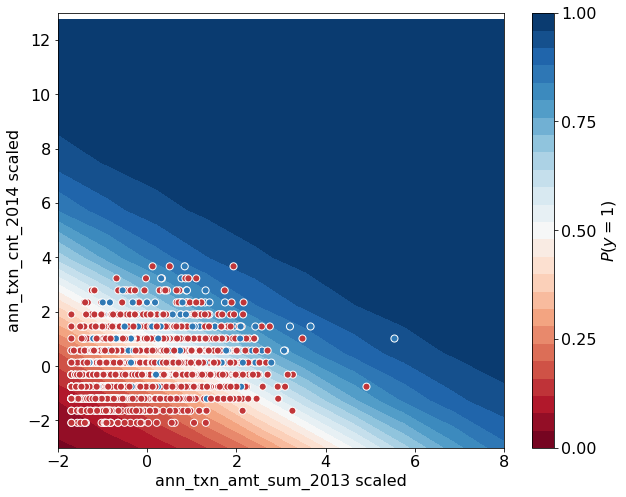

In [45]:
f, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual_scaled[50:,27], X_train_annual_scaled[50:, 38], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 8), ylim=(-3, 13),
       xlabel="ann_txn_amt_sum_2013 scaled", ylabel="ann_txn_cnt_2014 scaled")

## Logistic Regression with L1 regularization for Monthly features output

**1. Separate the inputs X and the output y in two data frames.**

In [46]:
X = monthly_features_outputs.drop(['response','CLNT_NO','ME_DT'],axis=1)
y = monthly_features_outputs['response']

**2. Split the data in train and test set. Use a test size value of 2/3 and set the random state
equal to 1147 for consistency (i.e. the course code value). Use the following names for
consistency.**

In [47]:
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X, y, test_size=2/3, random_state=1147)
X_test_monthly.shape

(215699, 28)

**3. Pre-process**

In [48]:
scaler = StandardScaler()
X_train_monthly_scaled = scaler.fit_transform(X_train_monthly)
X_train_monthly_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [49]:
X_test_monthly_scaled = scaler.transform(X_test_monthly)

**4. Fit the training dataset and optimize the hyperparameters of the method.**

In [50]:
C = [10, 1, .1, 0.01, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train_monthly_scaled, y_train_monthly)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train_monthly_scaled, y_train_monthly))
    print('Test accuracy:', clf.score(X_test_monthly_scaled, y_test_monthly))
    print('')

C: 10
Coefficient of each feature: [[ 0.06243128 -0.06219571 -0.01938436 -0.11695901  0.12495693  0.0828848
   0.0617247  -0.11452412  0.07233432  0.01684782  0.12675314 -0.02088576
  -0.05822306 -0.05599462  0.52573318  0.48190028 -0.24836201 -0.30542534
  -0.38297095  0.12485724 -0.02692864 -0.00695901 -0.0093371  -0.02754662
  -0.01250532 -0.02345132  0.         -0.12639219]]
Training accuracy: 0.9062856401079287
Test accuracy: 0.9058780986467253

C: 1
Coefficient of each feature: [[ 0.05831875 -0.07915607 -0.08978989 -0.02419681  0.1114436   0.04256761
   0.08104809 -0.10231505  0.05525204  0.0271832   0.12785526 -0.01901312
  -0.05321028 -0.05717722  0.51313126  0.48728853 -0.24262201 -0.34342585
  -0.33814644  0.11943528 -0.01892648  0.00088567 -0.00116946 -0.01949239
  -0.004482   -0.01529958  0.0079853  -0.12615469]]
Training accuracy: 0.9062856401079287
Test accuracy: 0.9058780986467253

C: 0.1
Coefficient of each feature: [[ 3.10760739e-02 -5.16043723e-02  0.00000000e+00  0.0

In [51]:
LogReg = LogisticRegression(penalty = 'l1', C=0.01, solver='liblinear', class_weight='balanced')
LogReg.fit(X_train_monthly_scaled, y_train_monthly)

LogisticRegression(C=0.01, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [52]:
m = LogReg.coef_
m

array([[ 0.        , -0.02505278,  0.00786119,  0.00524502,  0.0580791 ,
         0.        ,  0.        , -0.04609635,  0.09470196,  0.        ,
         0.0914843 ,  0.        , -0.05682611, -0.04368667,  0.42759775,
         0.49233371, -0.11781926, -0.31705708, -0.28112626,  0.        ,
        -0.01184824,  0.        ,  0.        , -0.01081189,  0.        ,
        -0.01228642,  0.00523136, -0.1177226 ]])

In [53]:
b = LogReg.intercept_
b

array([-0.07082822])

**5. Plot coeffcient values or feature importance.**

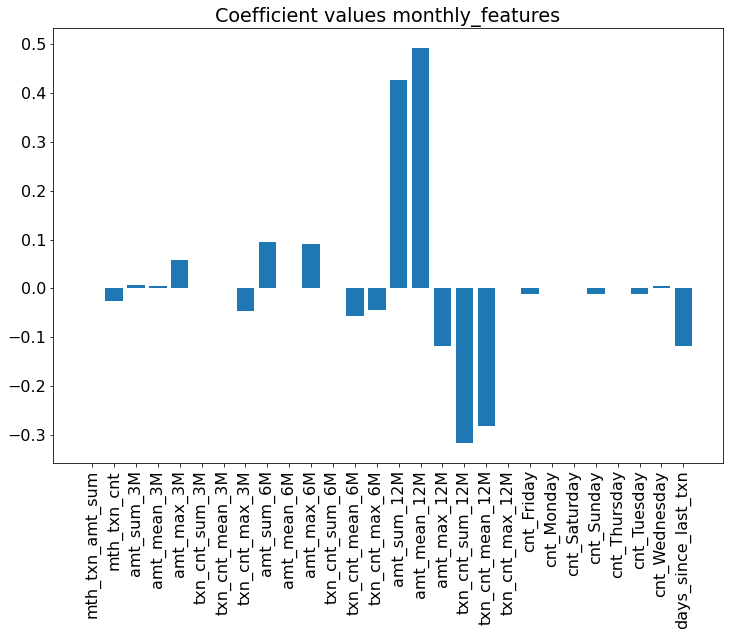

In [54]:
plt.rcParams['figure.figsize'] = (12,8)
# Create plot
plt.figure()
# Create plot title
plt.title("Coefficient values monthly_features")
# Add bars
plt.bar(range(X.shape[1]), m[0])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
# Show plot
plt.show()

In [55]:
y_test_monthly_predicted = LogReg.predict(X_test_monthly_scaled)
y_test_monthly_predicted

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
# How many 0s an 1s does the model predict in the test set?
unique_elements, counts_elements = np.unique(y_test_monthly_predicted, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1]
 [134287  81412]]


In [57]:
y_test_monthly_proba = LogReg.predict_proba(X_test_monthly_scaled)
y_test_monthly_proba

array([[0.54426269, 0.45573731],
       [0.45126229, 0.54873771],
       [0.53232623, 0.46767377],
       ...,
       [0.6255831 , 0.3744169 ],
       [0.62588899, 0.37411101],
       [0.71104841, 0.28895159]])

**6. Plot probability distribution for test set.**

Text(-11.969999999999999, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

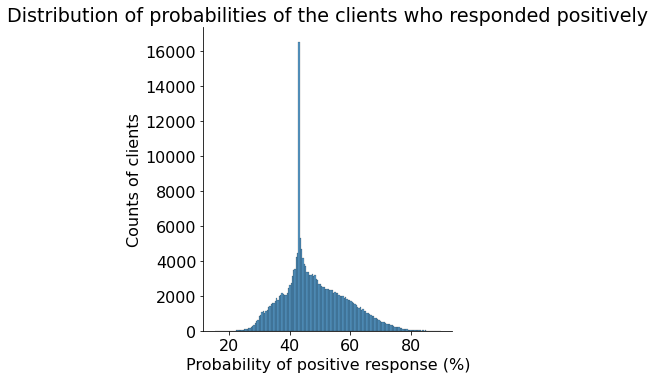

In [58]:
plt.figure(figsize=(5,5))
sns.displot(data = y_test_monthly_proba[:,1], x = 100*y_test_monthly_proba[:,1])
plt.title('Distribution of probabilities of the clients who responded positively')
plt.xlabel('Probability of positive response (%)')
plt.ylabel('Counts of clients')

**7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.**

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_monthly, y_test_monthly_predicted)
print(cm)

[[124841  70556]
 [  9446  10856]]


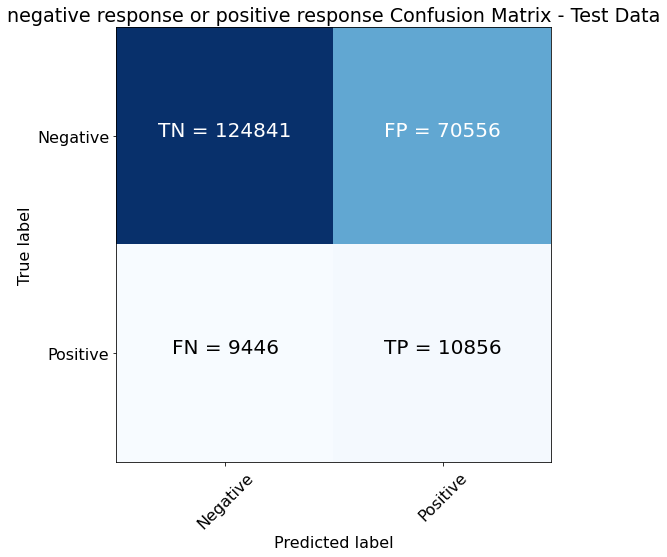

In [60]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('negative response or positive response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test_monthly, y_test_monthly_predicted, target_names = ['negative response', 'positive response']))

                   precision    recall  f1-score   support

negative response       0.93      0.64      0.76    195397
positive response       0.13      0.53      0.21     20302

         accuracy                           0.63    215699
        macro avg       0.53      0.59      0.49    215699
     weighted avg       0.85      0.63      0.71    215699



In [62]:
accuracy_score(y_test_monthly, y_test_monthly_predicted, normalize = True) # Change normalize = True/False as well. DIAGONAL OVER ALL

0.6291035192560003

### ROC curves of train/test set.

In [63]:
from sklearn.metrics import roc_curve, auc

In [64]:
# Scores for train set
scores_train = LogReg.predict_proba(X_train_monthly_scaled)[:, 1]
# Scores for test set
scores_test = LogReg.predict_proba(X_test_monthly_scaled)[:, 1]

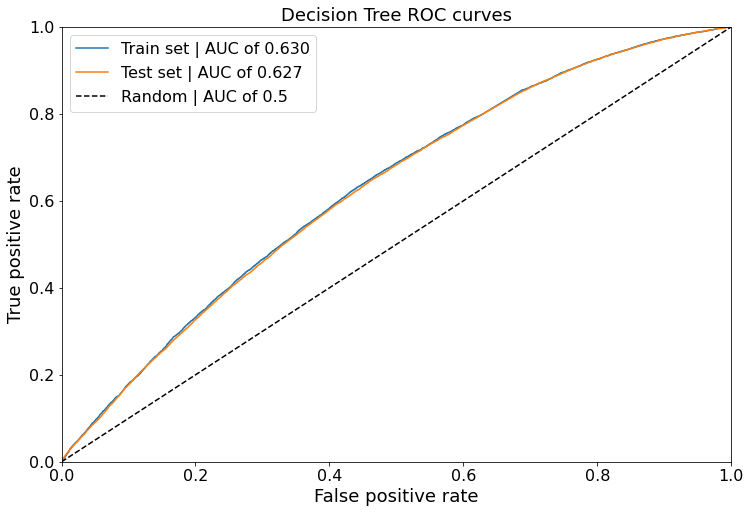

In [65]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

**8. Plot decision boundary for top 2 features.**

In [66]:
xx, yy = np.mgrid[-2:8:1.1111, -3:13:1.75] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
grid.shape # Confirm that grid shape is 10x10

(100, 2)

In [67]:
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly_scaled, axis=0) 
#pd.DataFrame(median_inputs)

In [68]:
#we replace the 15th and 8th column with the values of the grid
median_inputs[:,15] = grid[:,0]
median_inputs[:,18] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:13,:12] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 15)|(x.name == 18)  else '' for i in x])

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.578029,-0.619104,-0.193219,-0.193219,-0.025395,-0.114168,-0.114168,0.212368,-0.169110,-0.169110,-0.011853,-0.066514
1,-0.578029,-0.619104,-0.193219,-0.193219,-0.025395,-0.114168,-0.114168,0.212368,-0.169110,-0.169110,-0.011853,-0.066514
2,-0.578029,-0.619104,-0.193219,-0.193219,-0.025395,-0.114168,-0.114168,0.212368,-0.169110,-0.169110,-0.011853,-0.066514
3,-0.578029,-0.619104,-0.193219,-0.193219,-0.025395,-0.114168,-0.114168,0.212368,-0.169110,-0.169110,-0.011853,-0.066514
4,-0.578029,-0.619104,-0.193219,-0.193219,-0.025395,-0.114168,-0.114168,0.212368,-0.169110,-0.169110,-0.011853,-0.066514
5,-0.578029,-0.619104,-0.193219,-0.193219,-0.025395,-0.114168,-0.114168,0.212368,-0.169110,-0.169110,-0.011853,-0.066514
6,-0.578029,-0.619104,-0.193219,-0.193219,-0.025395,-0.114168,-0.114168,0.212368,-0.169110,-0.169110,-0.011853,-0.066514
7,-0.578029,-0.619104,-0.193219,-0.193219,-0.025395,-0.114168,-0.114168,0.212368,-0.169110,-0.169110,-0.011853,-0.066514
8,-0.578029,-0.619104,-0.193219,-0.193219,-0.025395,-0.114168,-0.114168,0.212368,-0.169110,-0.169110,-0.011853,-0.066514
9,-0.578029,-0.619104,-0.193219,-0.193219,-0.025395,-0.114168,-0.114168,0.212368,-0.169110,-0.169110,-0.011853,-0.066514


In [69]:
probs = LogReg.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[None,
 (-2.0, 8.0),
 (-3.0, 13.0),
 Text(0.5, 0, 'amt_mean_12M'),
 Text(0, 0.5, 'txn_cnt_mean_12M')]

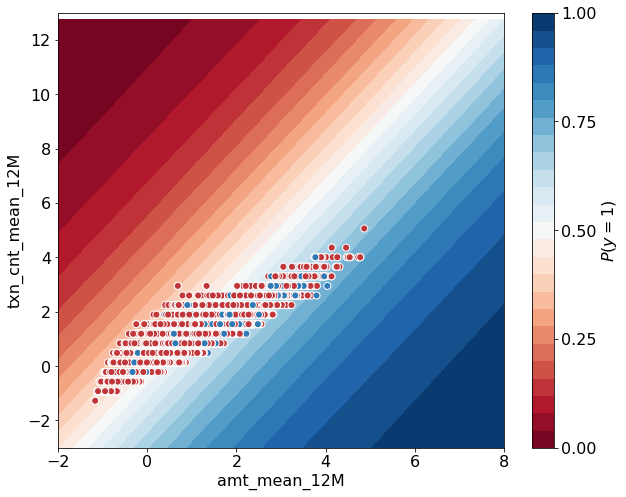

In [70]:
f, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly_scaled[50:,15], X_train_monthly_scaled[50:,18], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 8), ylim=(-3, 13),
       xlabel="amt_mean_12M", ylabel="txn_cnt_mean_12M")

### Decision tree for Annual Features

**1. Separate the inputs X and the output y in two data frames.**

In [19]:
X1 = annual_feature_outputs.drop(['response','customer_id'],axis=1)
y1 = annual_feature_outputs['response']

**2. Split the data in train and test set. Use a test size value of 2/3 and set the random state
equal to 1147 for consistency (i.e. the course code value). Use the following names for
consistency.**

In [20]:
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X1, y1, test_size=2/3, random_state=1147)
X_test_annual.shape

(4590, 75)

**Create a tree object and optimize for different depths**

In [21]:
depths = list(range(1, 11))

In [22]:
Train_Error_tree = np.zeros(shape=(len(depths),1))
Test_Error_tree = np.zeros(shape=(len(depths),1))

In [75]:
count = -1
for depth in depths:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    single_tree = DecisionTreeClassifier(max_depth=depth, random_state=1)
    # Fit the model
    single_tree.fit(X_train_annual, y_train_annual)
    Train_Error_tree[count,0] = single_tree.score(X_train_annual, y_train_annual)
    Test_Error_tree[count,0]  = single_tree.score(X_test_annual, y_test_annual)  

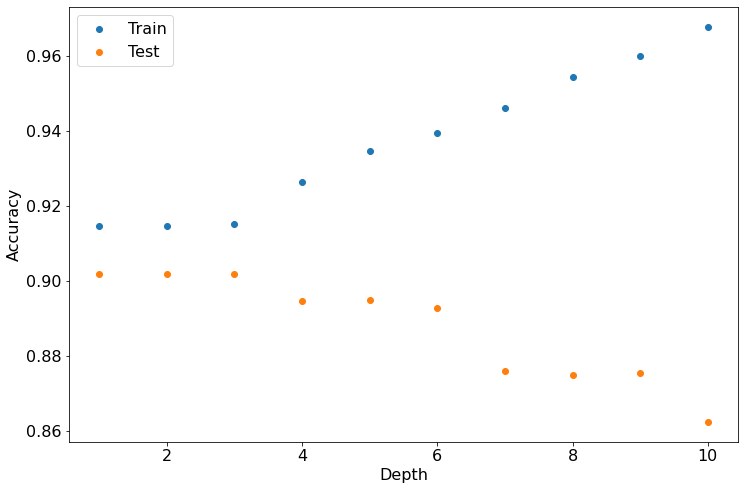

In [76]:
plt.scatter(depths, Train_Error_tree, label='Train')
plt.scatter(depths, Test_Error_tree, label='Test')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the above graph, we can verrify that the data shows considerable change after 3rd depth. So we will choose the depth 3 for our model

**Re-create the optimal tree**

In [23]:
best_tree = DecisionTreeClassifier(max_depth=3, random_state=0, class_weight='balanced', ccp_alpha=0.001) 

In [24]:
# Fit the model
model_dt = best_tree.fit(X_train_annual, y_train_annual)
Train_Error_best_tree = best_tree.score(X_train_annual, y_train_annual)
Test_Error_best_tree = best_tree.score(X_test_annual, y_test_annual)

print('Train Mean Accuracy:', round(Train_Error_best_tree,2))
print('Test Mean Accuracy:', round(Test_Error_best_tree,2))

Train Mean Accuracy: 0.72
Test Mean Accuracy: 0.7


**Plot coeffcient values or feature importance.**

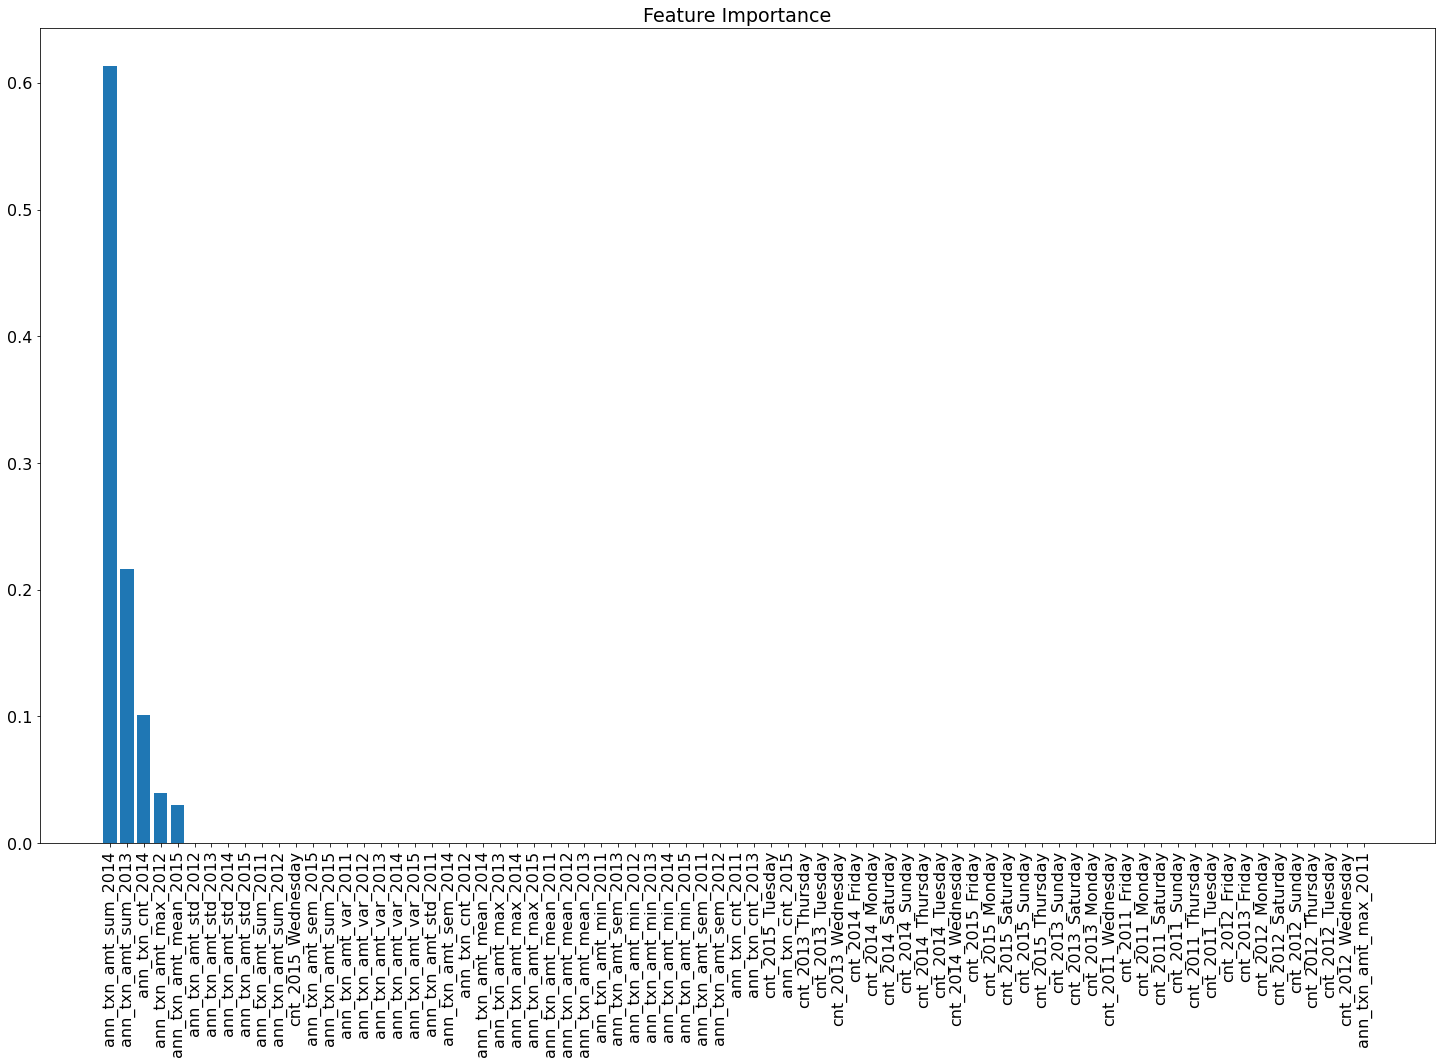

In [25]:

# Calculate feature importances
importances = model_dt.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X1.columns [i] for i in indices]

plt.rcParams['figure.figsize'] = (25,15)
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X1.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X1.shape[1]), names, rotation=90)
plt.show()

In [26]:
y_test_annual_predicted = model_dt.predict(X_test_annual)
y_test_annual_predicted

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [27]:
# How many 0s an 1s does the model predict in the test set?
unique_elements, counts_elements = np.unique(y_test_annual_predicted, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [3088 1502]]


In [28]:
y_test_annual_proba = model_dt.predict_proba(X_test_annual)
y_test_annual_proba

array([[0.9791223 , 0.0208777 ],
       [0.58012598, 0.41987402],
       [0.25046719, 0.74953281],
       ...,
       [0.62708852, 0.37291148],
       [0.79072551, 0.20927449],
       [0.25046719, 0.74953281]])

In [29]:
# How many different probabilities of defaulting are there and how many clients in each?
unique_elements, counts_elements = np.unique(y_test_annual_proba[:,1], return_counts=True)
print("Frequency of unique values of the said array:")
print(unique_elements)
print(counts_elements)

Frequency of unique values of the said array:
[0.0208777  0.20927449 0.23944305 0.37291148 0.41987402 0.66860239
 0.74055771 0.74953281]
[968 786  83 675 576 431  80 991]


**Plot probability distribution for test set.**

Text(-1.8449999999999989, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

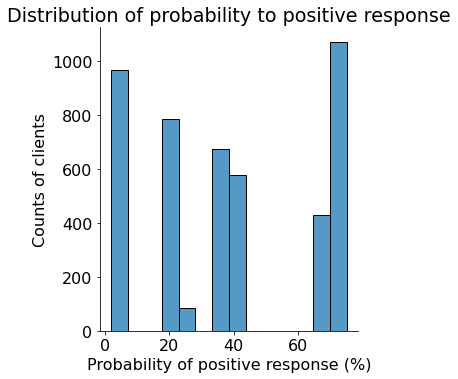

In [30]:
plt.figure(figsize=(5,5))
sns.displot(data = y_test_annual_proba[:,1], x = 100*y_test_annual_proba[:,1])
plt.title('Distribution of probability to positive response')
plt.xlabel('Probability of positive response (%)')
plt.ylabel('Counts of clients')

The above graph depicts 7 buckets with 2.08, 20.92, 23.94, 37.29, 41.98, 66.86, 74.05, 74.95% probability to positive response 

**Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.**

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_annual, y_test_annual_predicted)
print(cm)

[[2934 1205]
 [ 154  297]]


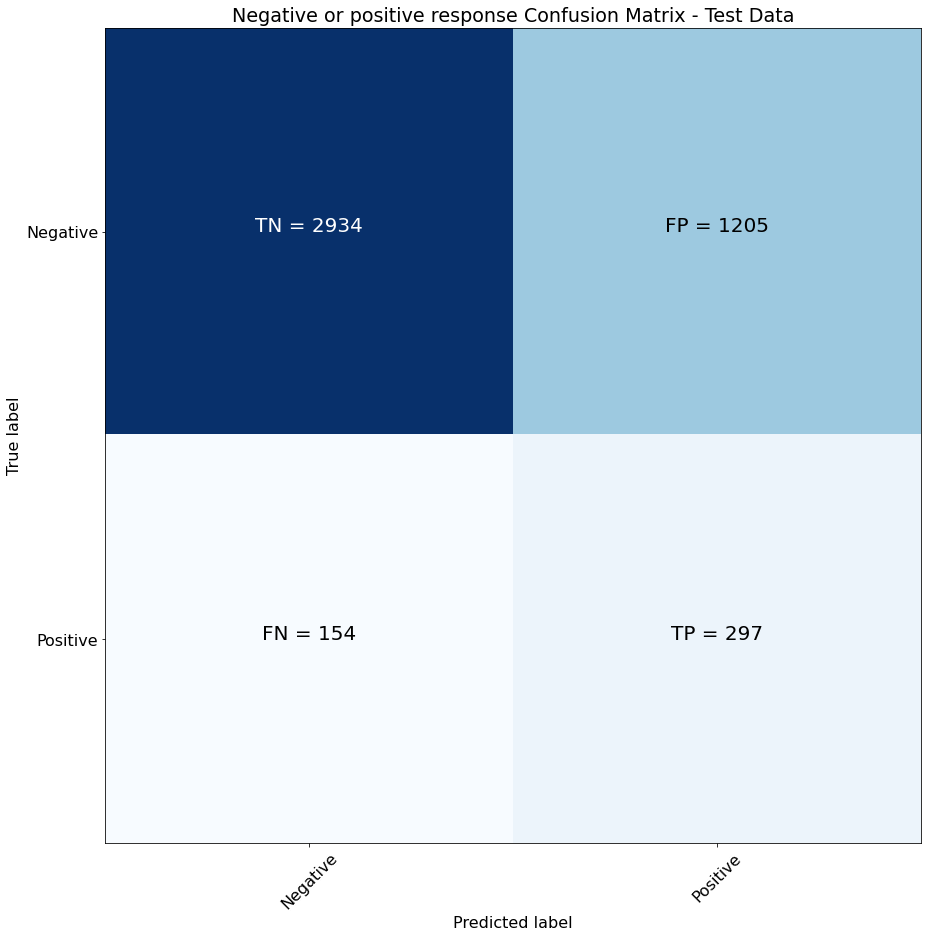

In [85]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Negative or positive response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test_annual, y_test_annual_predicted, target_names = ['negative response', 'positive response']))

                   precision    recall  f1-score   support

negative response       0.95      0.71      0.81      4139
positive response       0.20      0.66      0.30       451

         accuracy                           0.70      4590
        macro avg       0.57      0.68      0.56      4590
     weighted avg       0.88      0.70      0.76      4590



In [87]:
accuracy_score(y_test_annual, y_test_annual_predicted, normalize = True) # Change normalize = True/False as well. DIAGONAL OVER ALL

0.703921568627451

In [88]:
from sklearn.metrics import roc_curve, auc

In [89]:
# Scores for train set
scores_train = model_dt.predict_proba(X_train_annual)[:, 1]
# Scores for test set
scores_test = model_dt.predict_proba(X_test_annual)[:, 1]

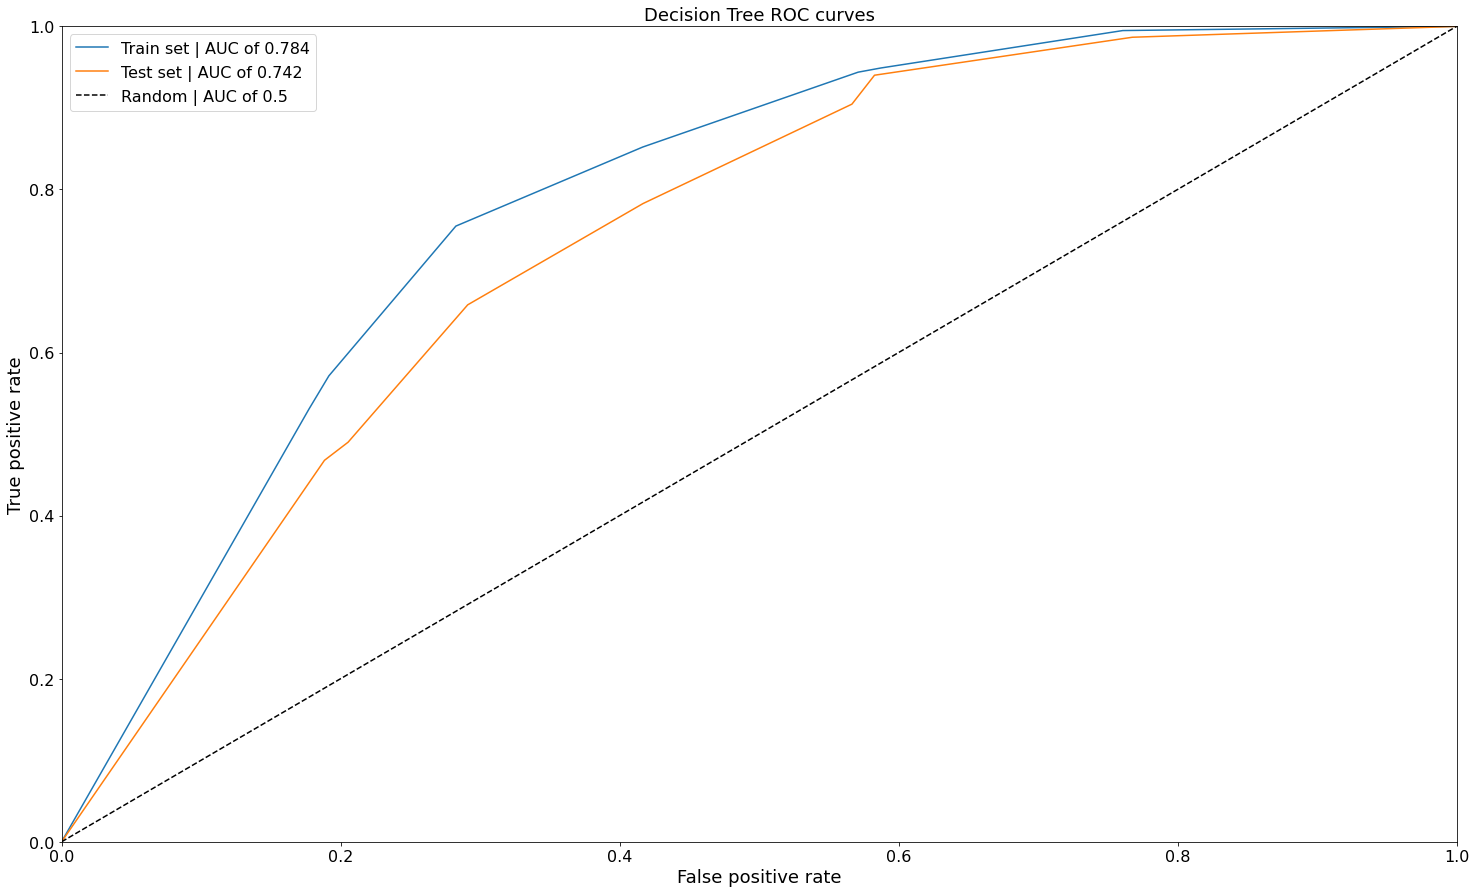

In [90]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

**Plot decision boundary for top 2 features.**

In [91]:
xx, yy = np.mgrid[0:10:1.1111, 0:10:1.1111] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

# np.ones is a table full of ones with 100x23 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((100, 75)) * np.median(X_train_annual, axis=0) 
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

# Then, we replace the 5th and 11th column with the values of the grid
median_inputs[:,0] = grid[:,0]
median_inputs[:,1] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:13,:12] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 0)|(x.name == 1)  else '' for i in x])

(100, 2)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,89.000000,89.000000,46.000000,64.000000,65.666667,65.330357,66.000000,44.000000,44.000000,41.000000
1,0.000000,1.111100,89.000000,89.000000,46.000000,64.000000,65.666667,65.330357,66.000000,44.000000,44.000000,41.000000
2,0.000000,2.222200,89.000000,89.000000,46.000000,64.000000,65.666667,65.330357,66.000000,44.000000,44.000000,41.000000
3,0.000000,3.333300,89.000000,89.000000,46.000000,64.000000,65.666667,65.330357,66.000000,44.000000,44.000000,41.000000
4,0.000000,4.444400,89.000000,89.000000,46.000000,64.000000,65.666667,65.330357,66.000000,44.000000,44.000000,41.000000
5,0.000000,5.555500,89.000000,89.000000,46.000000,64.000000,65.666667,65.330357,66.000000,44.000000,44.000000,41.000000
6,0.000000,6.666600,89.000000,89.000000,46.000000,64.000000,65.666667,65.330357,66.000000,44.000000,44.000000,41.000000
7,0.000000,7.777700,89.000000,89.000000,46.000000,64.000000,65.666667,65.330357,66.000000,44.000000,44.000000,41.000000
8,0.000000,8.888800,89.000000,89.000000,46.000000,64.000000,65.666667,65.330357,66.000000,44.000000,44.000000,41.000000
9,0.000000,9.999900,89.000000,89.000000,46.000000,64.000000,65.666667,65.330357,66.000000,44.000000,44.000000,41.000000


In [92]:
probs = model_dt.predict_proba(median_inputs)[:,1].reshape(xx.shape)

[None,
 (0.0, 800.0),
 (0.0, 800.0),
 Text(0.5, 0, 'ann_txn_amt_sum_2014'),
 Text(0, 0.5, 'ann_txn_amt_sum_2013')]

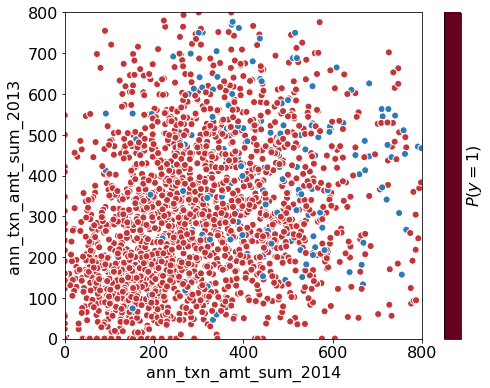

In [93]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0.5, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual['ann_txn_amt_sum_2014'][50:], X_train_annual['ann_txn_amt_sum_2013'][50:], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
#plt.annotate('Node #6 \n P(default) = 69.9%', xy=(5,1), xycoords='data',horizontalalignment= 'center', fontsize = 14)
#plt.annotate('Node #2 \n P = 15.0%', xy=(-0.5,0.5), xycoords='data',horizontalalignment= 'center', fontsize = 14)
#plt.annotate('Node #5 \n P = 43.1%', xy=(-0.5,6.0), xycoords='data',horizontalalignment= 'center', fontsize = 14)

ax.set(aspect="auto",
       xlim=(0, 800), ylim=(0, 800),
       xlabel="ann_txn_amt_sum_2014", ylabel="ann_txn_amt_sum_2013")

### Decision tree for Monthly Features

**1. Separate the inputs X and the output y in two data frames.**

In [31]:
X1= monthly_features_outputs.drop(['response','CLNT_NO','ME_DT'],axis=1)
y1 = monthly_features_outputs['response']

**2. Split the data in train and test set. Use a test size value of 2/3 and set the random state
equal to 1147 for consistency (i.e. the course code value). Use the following names for
consistency.**

In [32]:
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X1, y1, test_size=2/3, random_state=1147)
X_test_monthly.shape

(215699, 28)

**Create a tree object and optimize for different depths**

In [33]:
depths = list(range(1, 11))

In [34]:
Train_Error_tree = np.zeros(shape=(len(depths),1))
Test_Error_tree = np.zeros(shape=(len(depths),1))

In [98]:
count = -1
for depth in depths:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    single_tree = DecisionTreeClassifier(max_depth=depth, random_state=1)
    # Fit the model
    single_tree.fit(X_train_monthly, y_train_monthly)
    Train_Error_tree[count,0] = single_tree.score(X_train_monthly, y_train_monthly)
    Test_Error_tree[count,0]  = single_tree.score(X_test_monthly, y_test_monthly)  

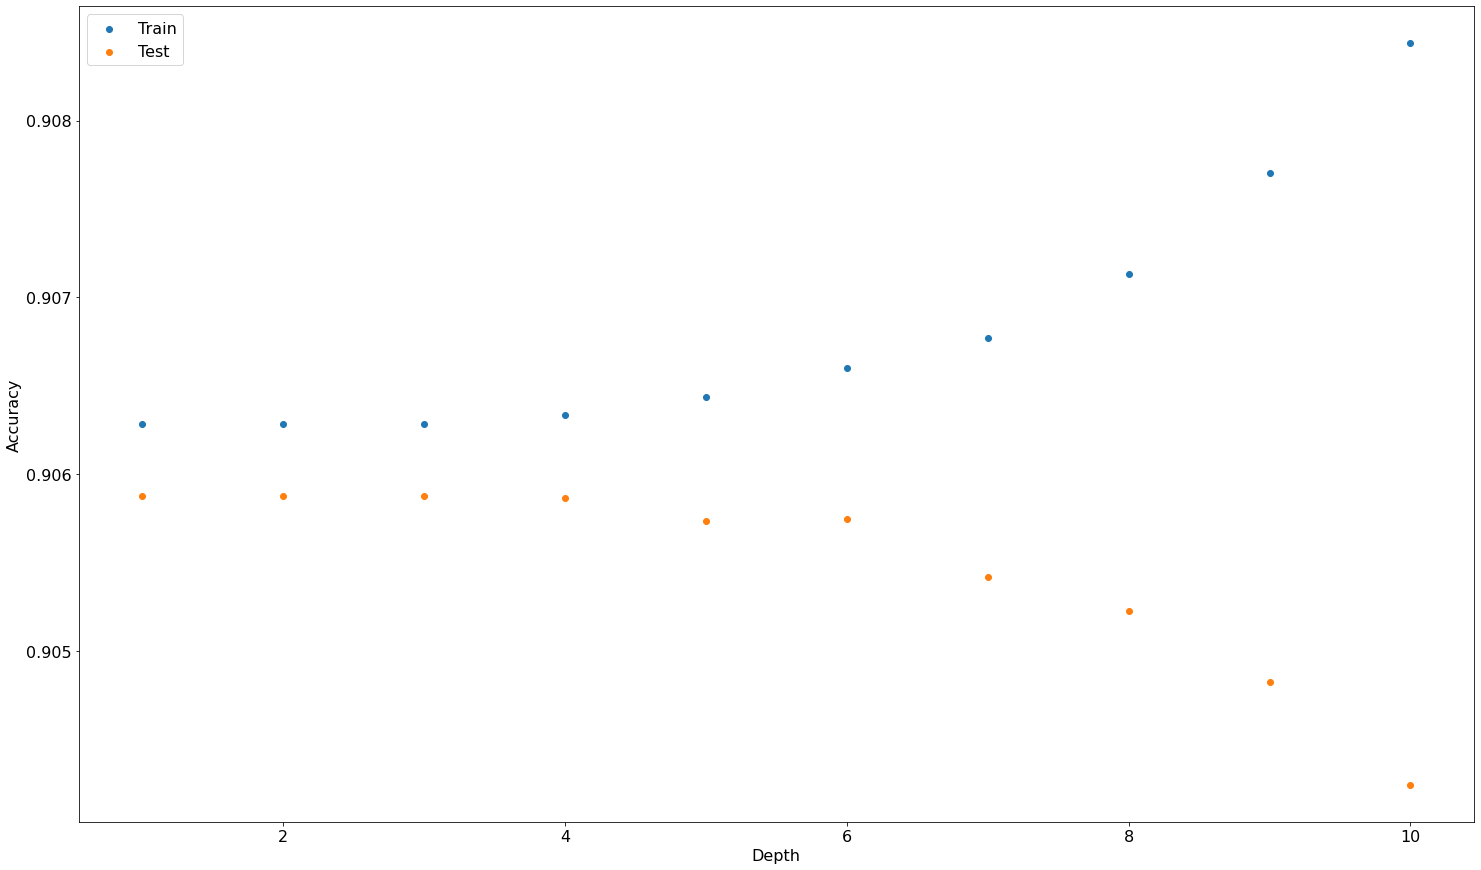

In [99]:
plt.scatter(depths, Train_Error_tree, label='Train')
plt.scatter(depths, Test_Error_tree, label='Test')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the above graph, we can verrify that the data shows considerable change after 3rd depth. So we will choose the depth 3 for our model

**Re-create the optimal tree**

In [35]:
best_tree = DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=1147) 

In [36]:
# Fit the model
model_dt = best_tree.fit(X_train_monthly, y_train_monthly)
Train_Error_best_tree = best_tree.score(X_train_monthly, y_train_monthly)
Test_Error_best_tree = best_tree.score(X_test_monthly, y_test_monthly)

print('Train Mean Accuracy:', round(Train_Error_best_tree,2))
print('Test Mean Accuracy:', round(Test_Error_best_tree,2))

Train Mean Accuracy: 0.62
Test Mean Accuracy: 0.62


**Plot coeffcient values or feature importance.**

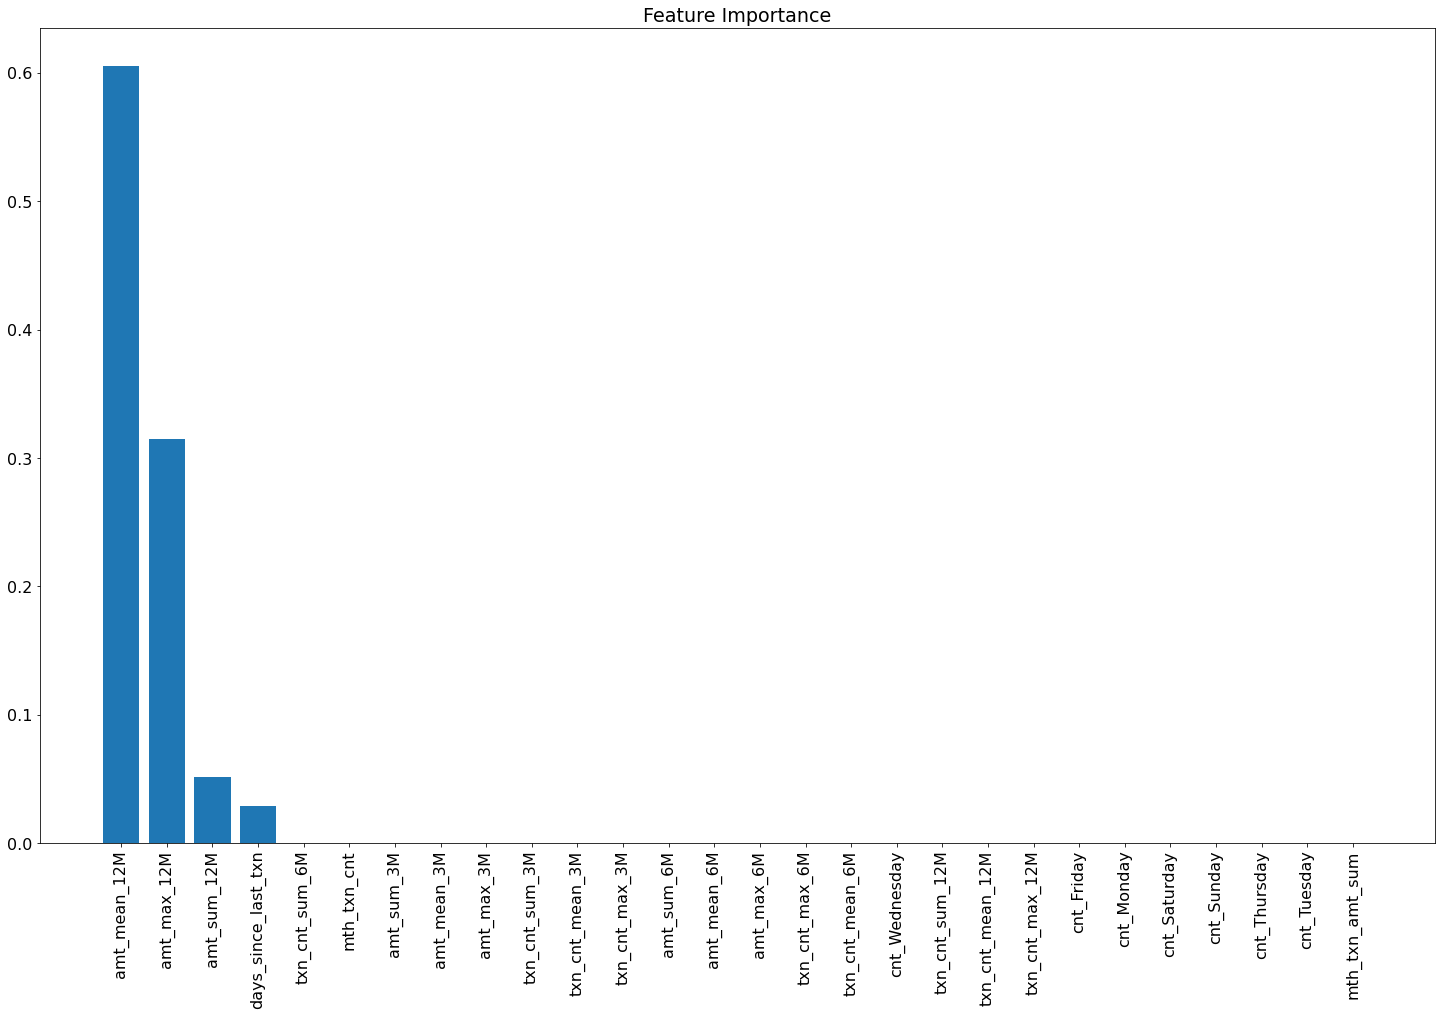

In [37]:
# Calculate feature importances
importances = model_dt.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X1.columns [i] for i in indices]

plt.rcParams['figure.figsize'] = (25,15)
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X1.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X1.shape[1]), names, rotation=90)
plt.show()

In [38]:
y_test_monthly_predicted = model_dt.predict(X_test_monthly)
y_test_monthly_predicted

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# How many 0s an 1s does the model predict in the test set?
unique_elements, counts_elements = np.unique(y_test_monthly_predicted, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1]
 [130395  85304]]


In [40]:
y_test_monthly_proba = model_dt.predict_proba(X_test_monthly)
y_test_monthly_proba

array([[0.50400707, 0.49599293],
       [0.41520663, 0.58479337],
       [0.73958989, 0.26041011],
       ...,
       [0.73958989, 0.26041011],
       [0.73958989, 0.26041011],
       [0.73958989, 0.26041011]])

In [41]:
# How many different probabilities of defaulting are there and how many clients in each?
unique_elements, counts_elements = np.unique(y_test_monthly_proba[:,1], return_counts=True)
print("Frequency of unique values of the said array:")
print(unique_elements)
print(counts_elements)

Frequency of unique values of the said array:
[0.20983447 0.26041011 0.36383713 0.42397922 0.49599293 0.52841292
 0.58479337 0.6443104 ]
[ 1913 42798   387 34446 50851 21189 26261 37854]


**Plot probability distribution for test set.**

Text(-11.969999999999999, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

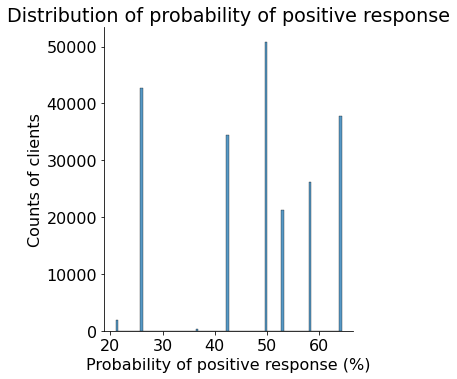

In [106]:
plt.figure(figsize=(5,5))
sns.displot(data = y_test_monthly_proba[:,1], x = 100*y_test_monthly_proba[:,1])
plt.title('Distribution of probability of positive response')
plt.xlabel('Probability of positive response (%)')
plt.ylabel('Counts of clients')

The above graph depicts 8 buckets with 20.98, 26.04, 36.38, 42.39, 49.59, 52.84, 58.47, 64.43% probability to positive response 

**Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.**

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_monthly, y_test_monthly_predicted)
print(cm)

[[121456  73941]
 [  8939  11363]]


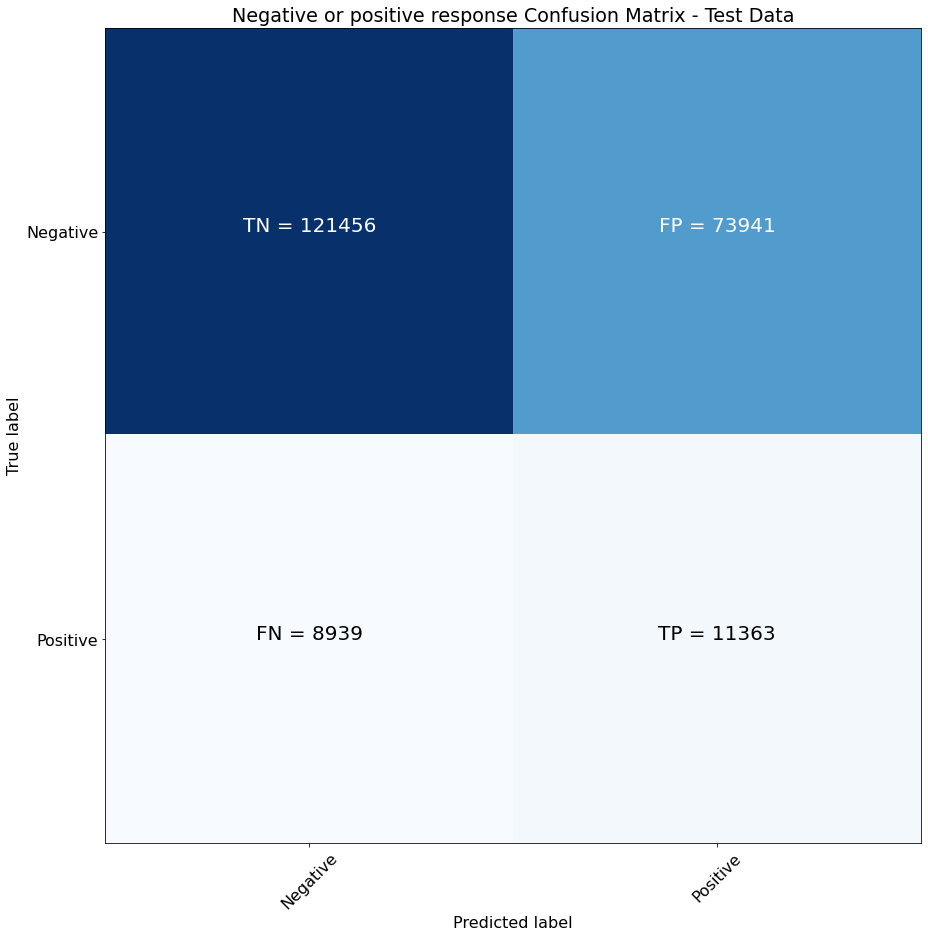

In [108]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Negative or positive response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test_monthly, y_test_monthly_predicted, target_names = ['negative response', 'positive response']))

                   precision    recall  f1-score   support

negative response       0.93      0.62      0.75    195397
positive response       0.13      0.56      0.22     20302

         accuracy                           0.62    215699
        macro avg       0.53      0.59      0.48    215699
     weighted avg       0.86      0.62      0.70    215699



In [110]:
accuracy_score(y_test_monthly, y_test_monthly_predicted, normalize = True) # Change normalize = True/False as well. DIAGONAL OVER ALL

0.6157608519279181

In [111]:
from sklearn.metrics import roc_curve, auc

In [112]:
# Scores for train set
scores_train = model_dt.predict_proba(X_train_monthly)[:, 1]
# Scores for test set
scores_test = model_dt.predict_proba(X_test_monthly)[:, 1]

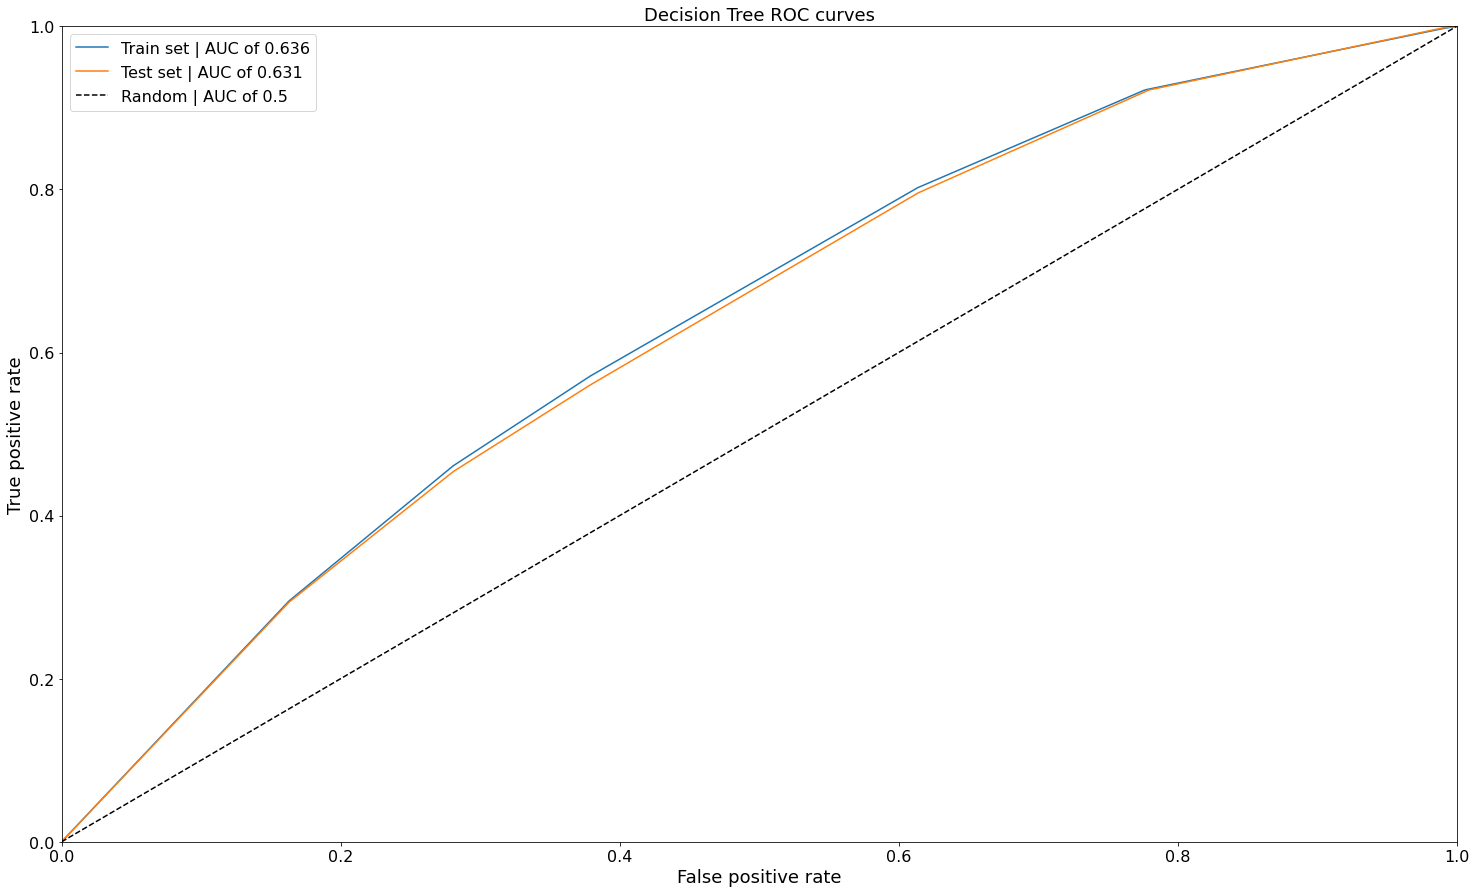

In [113]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

**Plot decision boundary for top 2 features.**

In [114]:
xx, yy = np.mgrid[0:10:1.1111, 0:10:1.1111] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

# np.ones is a table full of ones with 100x23 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly, axis=0) 
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

# Then, we replace the 5th and 11th column with the values of the grid
median_inputs[:,0] = grid[:,0]
median_inputs[:,1] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:13,:12] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 0)|(x.name == 1)  else '' for i in x])

(100, 2)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,58.000000,19.333333,55.000000,1.000000,0.333333,1.000000,117.000000,19.500000,77.000000,2.000000
1,0.000000,1.111100,58.000000,19.333333,55.000000,1.000000,0.333333,1.000000,117.000000,19.500000,77.000000,2.000000
2,0.000000,2.222200,58.000000,19.333333,55.000000,1.000000,0.333333,1.000000,117.000000,19.500000,77.000000,2.000000
3,0.000000,3.333300,58.000000,19.333333,55.000000,1.000000,0.333333,1.000000,117.000000,19.500000,77.000000,2.000000
4,0.000000,4.444400,58.000000,19.333333,55.000000,1.000000,0.333333,1.000000,117.000000,19.500000,77.000000,2.000000
5,0.000000,5.555500,58.000000,19.333333,55.000000,1.000000,0.333333,1.000000,117.000000,19.500000,77.000000,2.000000
6,0.000000,6.666600,58.000000,19.333333,55.000000,1.000000,0.333333,1.000000,117.000000,19.500000,77.000000,2.000000
7,0.000000,7.777700,58.000000,19.333333,55.000000,1.000000,0.333333,1.000000,117.000000,19.500000,77.000000,2.000000
8,0.000000,8.888800,58.000000,19.333333,55.000000,1.000000,0.333333,1.000000,117.000000,19.500000,77.000000,2.000000
9,0.000000,9.999900,58.000000,19.333333,55.000000,1.000000,0.333333,1.000000,117.000000,19.500000,77.000000,2.000000


In [115]:
probs = model_dt.predict_proba(median_inputs)[:,1].reshape(xx.shape)

[None,
 (-20.0, 200.0),
 (-20.0, 200.0),
 Text(0.5, 0, 'amt_mean_12M'),
 Text(0, 0.5, 'amt_max_12M')]

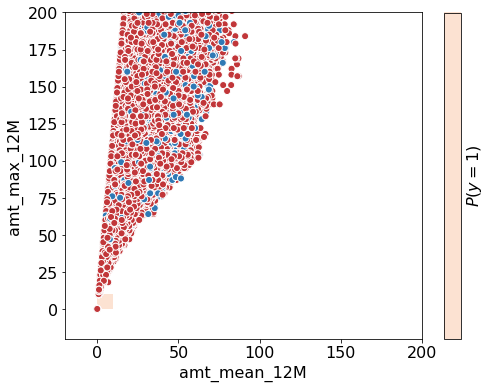

In [116]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly['amt_mean_12M'][50:], X_train_monthly['amt_max_12M'][50:], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
#plt.annotate('Node #6 \n P(default) = 69.9%', xy=(5,1), xycoords='data',horizontalalignment= 'center', fontsize = 14)
#plt.annotate('Node #2 \n P = 15.0%', xy=(-0.5,0.5), xycoords='data',horizontalalignment= 'center', fontsize = 14)
#plt.annotate('Node #5 \n P = 43.1%', xy=(-0.5,6.0), xycoords='data',horizontalalignment= 'center', fontsize = 14)

ax.set(aspect="auto",
       xlim=(-20, 200), ylim=(-20, 200),
       xlabel="amt_mean_12M", ylabel="amt_max_12M")

## Random Forests for Annual features

**1. Separate the inputs X and the output y in two data frames.**

In [117]:
X2 = annual_feature_outputs.drop(['response','customer_id'],axis=1)
y2 = annual_feature_outputs['response']

In [118]:
y2.value_counts()

0    6237
1     647
Name: response, dtype: int64

**Oversampling the dataset to balance the data**

In [119]:
!pip install imblearn  
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 'all')
X2,y2 = over_sample.fit_resample(X2,y2)
y2 = pd.Series(y2)
y2.value_counts()

0    6237
1    6237
Name: response, dtype: int64

**2. Split the data in train and test set. Use a test size value of 2/3 and set the random state
equal to 1147 for consistency (i.e. the course code value). Use the following names for
consistency.**

In [120]:
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X2, y2, test_size=2/3, random_state=1147)
X_test_annual.shape

(8316, 75)

### Optimizing parameters in Random forests

We have to optimize 3 parametrs in Random forests which are

1) depth
2) n_estimators
3) max_features

**Optimizing depth**

In [121]:
depths_for_RF = list(range(1, 15))

In [122]:
Train_Error_RF = np.zeros(shape=(len(depths_for_RF),1))
Test_Error_RF = np.zeros(shape=(len(depths_for_RF),1))

In [123]:
count = -1
for depth in depths_for_RF:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    random_forest_mdl = RandomForestClassifier(n_estimators=50, max_depth=depth, random_state=1147)
    # Fit the model
    random_forest_mdl.fit(X_train_annual, np.ravel(y_train_annual))
    Train_Error_RF[count,0] = random_forest_mdl.score(X_train_annual, np.ravel(y_train_annual))
    Test_Error_RF[count,0]  = random_forest_mdl.score(X_test_annual, np.ravel(y_test_annual))  

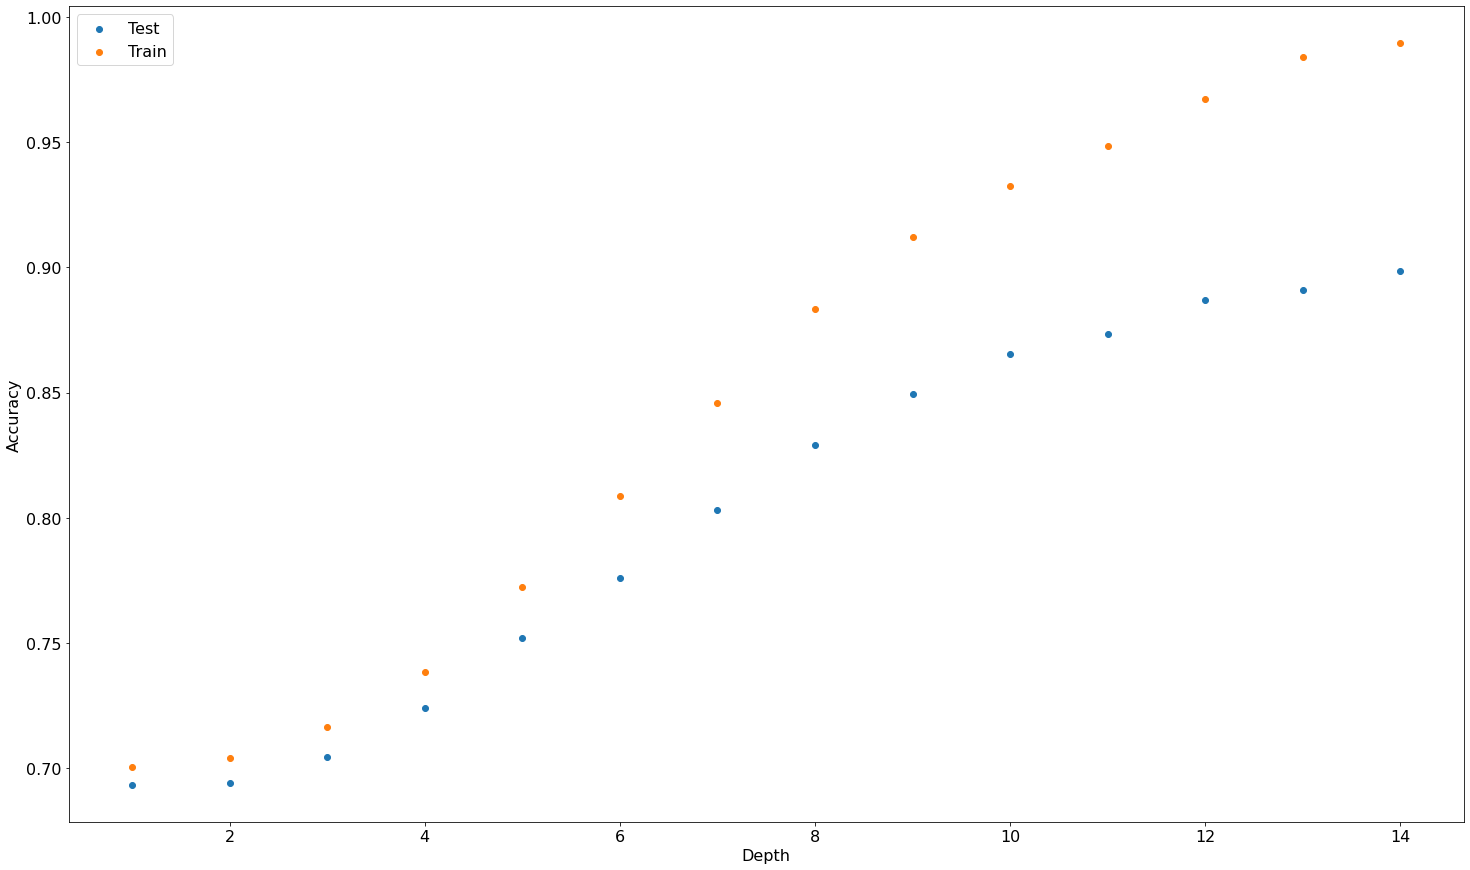

In [124]:
plt.scatter(depths_for_RF, Test_Error_RF, label='Test')
plt.scatter(depths_for_RF, Train_Error_RF, label='Train')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Choosing the Depth as 8 from the grapgh Accuracy vs Depth since the data plateaus after 8

**Optimizing n_estimators**

In [125]:
number_of_estimators = list(range(1, 51))

In [126]:
Train_Error_RF = np.zeros(shape=(len(number_of_estimators),1))
Test_Error_RF = np.zeros(shape=(len(number_of_estimators),1))

In [127]:
count = -1
for n_estimators in number_of_estimators:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    random_forest_mdl = RandomForestClassifier(n_estimators=n_estimators, max_depth=8, random_state=1147)
    # Fit the model
    random_forest_mdl.fit(X_train_annual, np.ravel(y_train_annual))
    Train_Error_RF[count,0] = random_forest_mdl.score(X_train_annual, np.ravel(y_train_annual))
    Test_Error_RF[count,0]  = random_forest_mdl.score(X_test_annual, np.ravel(y_test_annual))  

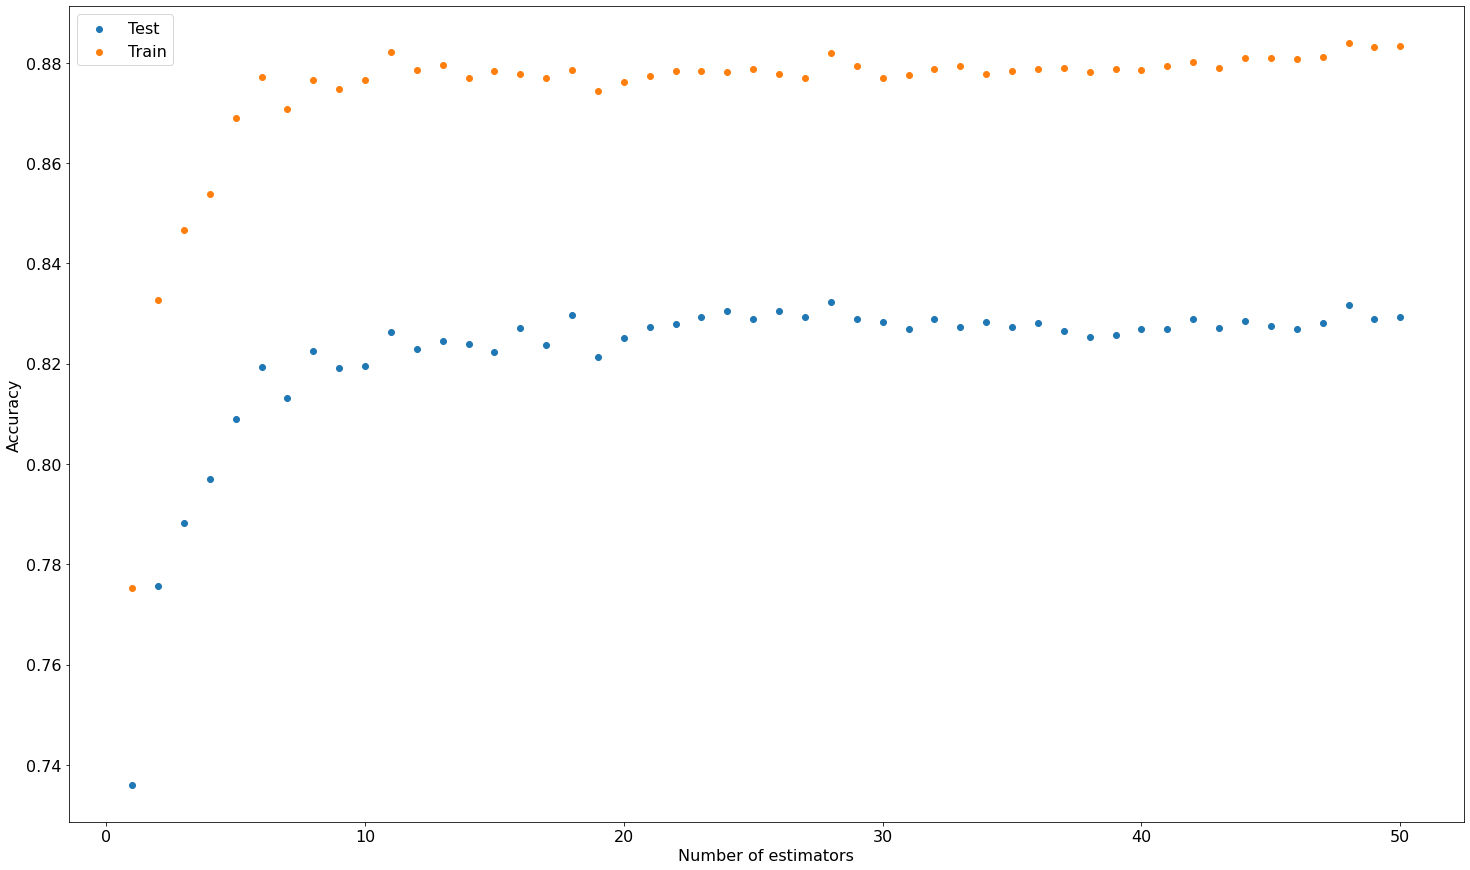

In [128]:
plt.scatter(number_of_estimators, Test_Error_RF, label='Test')
plt.scatter(number_of_estimators, Train_Error_RF, label='Train')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The number of estimators can be chosen anywhere between 10 to 50 since the data stabilizes after 10.

Let us consider the number of estimators to be 25

**Optimizing max_features**

In [129]:
max_features_list = list(range(1, 31))

In [130]:
Train_Error_RF = np.zeros(shape=(len(max_features_list),1))
Test_Error_RF = np.zeros(shape=(len(max_features_list),1))

In [131]:
count = -1
for max_features in max_features_list:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    random_forest_mdl = RandomForestClassifier(n_estimators=25, max_depth=8, max_features = max_features, random_state=1147)
    # Fit the model
    random_forest_mdl.fit(X_train_annual, np.ravel(y_train_annual))
    Train_Error_RF[count,0] = random_forest_mdl.score(X_train_annual, np.ravel(y_train_annual))
    Test_Error_RF[count,0]  = random_forest_mdl.score(X_test_annual, np.ravel(y_test_annual))  

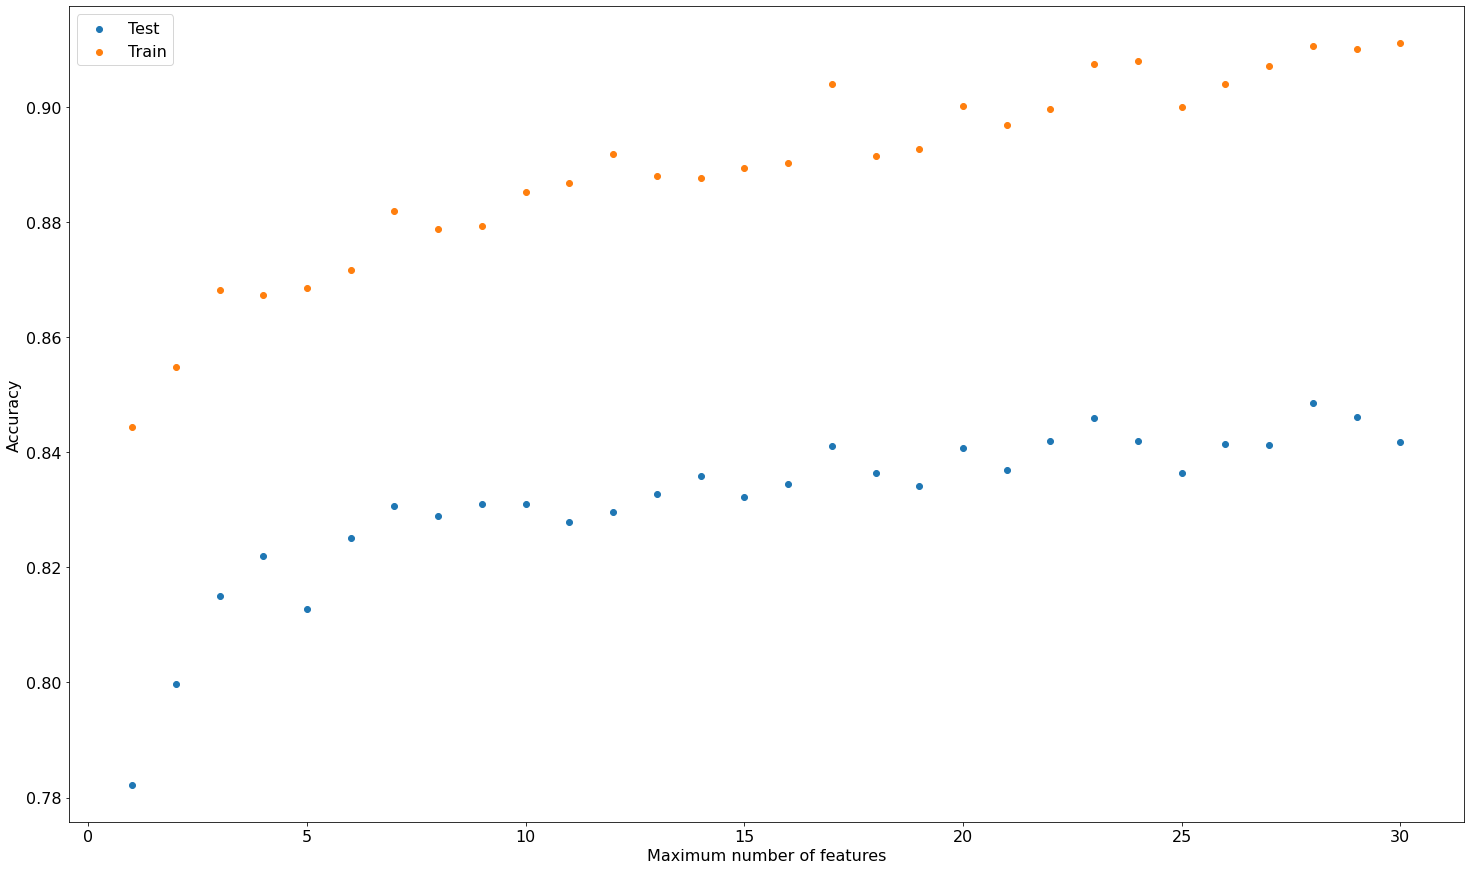

In [132]:
plt.scatter(max_features_list, Test_Error_RF, label='Test')
plt.scatter(max_features_list, Train_Error_RF, label='Train')
plt.xlabel('Maximum number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Typically there is not a clear trend with max_features

### Re-create the optimal Random Forest

In [133]:
best_RF = RandomForestClassifier(n_estimators=25, max_depth=8, random_state=1147)

In [134]:
# Fit the model
best_RF.fit(X_train_annual, np.ravel(y_train_annual))
Train_Error_RF = best_RF.score(X_train_annual, y_train_annual)
Test_Error_RF = best_RF.score(X_test_annual, y_test_annual)

print('Train Mean Accuracy:', round(Train_Error_RF,2))
print('Test Mean Accuracy:', round(Test_Error_RF,2))

Train Mean Accuracy: 0.88
Test Mean Accuracy: 0.83


**Plot coeffcient values or feature importance.**

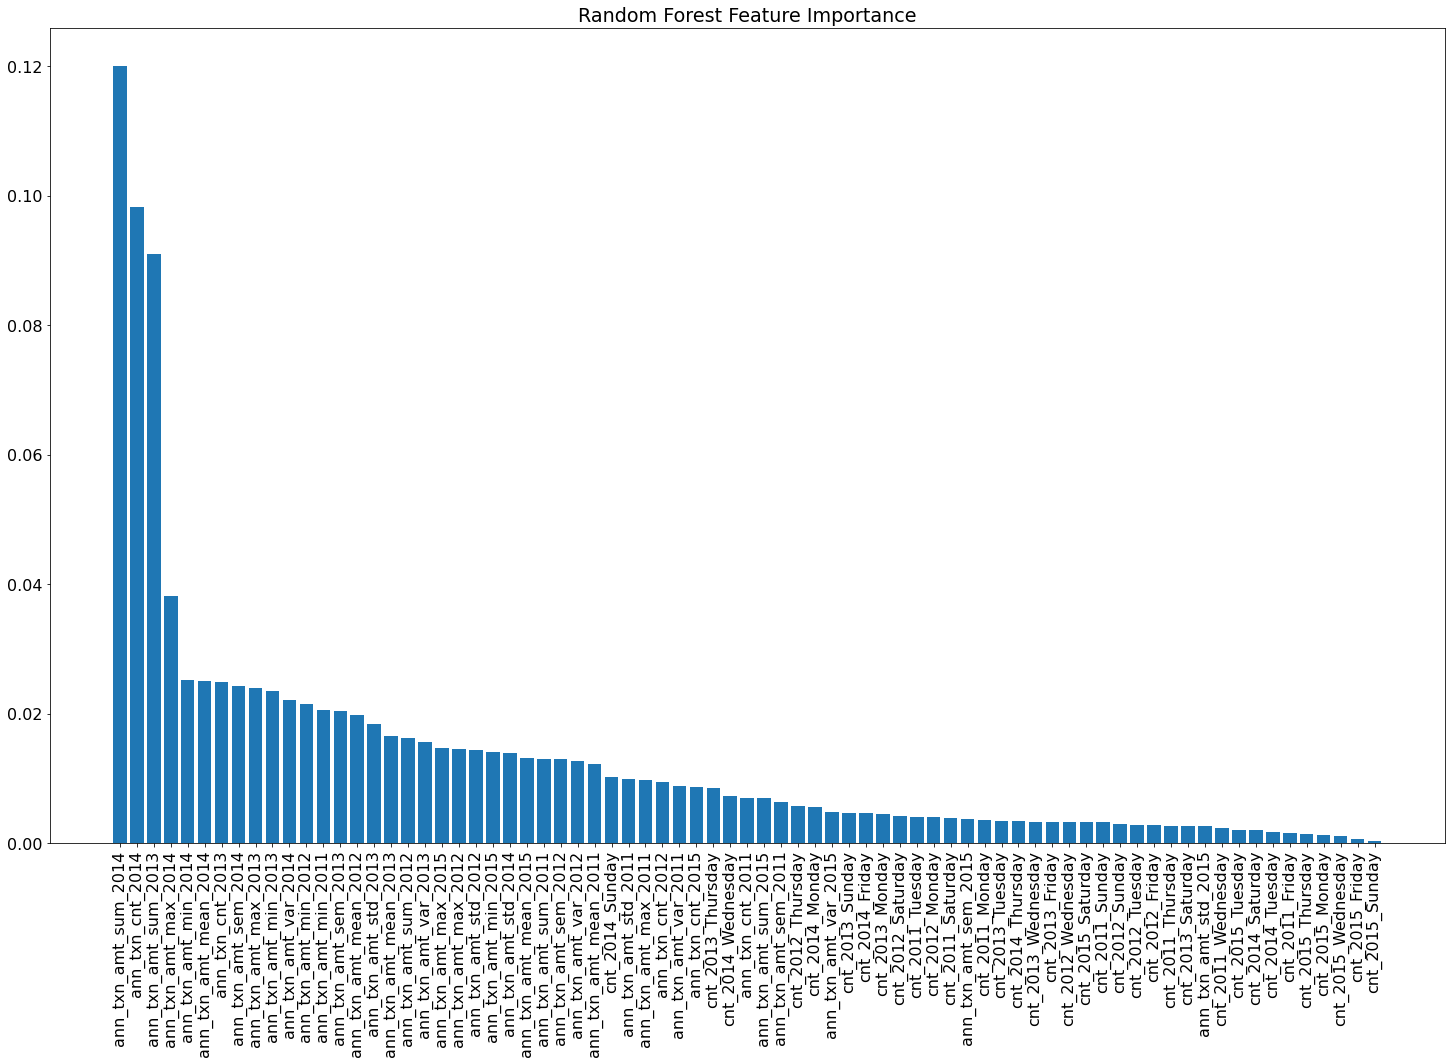

In [135]:
# Calculate feature importances
importances = best_RF.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X2.columns [i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Random Forest Feature Importance")
# Add bars
plt.bar(range(X2.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X2.shape[1]), names, rotation=90)
plt.show()

In [136]:
# Define and fit
estimator      = RandomForestClassifier(n_estimators=25, max_depth=8, random_state=1147) 
rf_best_model = estimator.fit(X_train_annual, y_train_annual)
# Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
scores_train = rf_best_model.predict_proba(X_train_annual)[:,1] 
scores_test  = rf_best_model.predict_proba(X_test_annual)[:,1]  
# Predict the class of test set
y_test_annual_predicted = rf_best_model.predict(X_test_annual)
# Calculate accuracy at every iteration and append
accuracy = 100*accuracy_score(y_test_annual, y_test_annual_predicted, normalize = True)
# ROC Calc Train set 
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# Calculate the AUCs
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

### Plot the probabilities distribution and the ROC curves.

Text(-1.8449999999999989, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

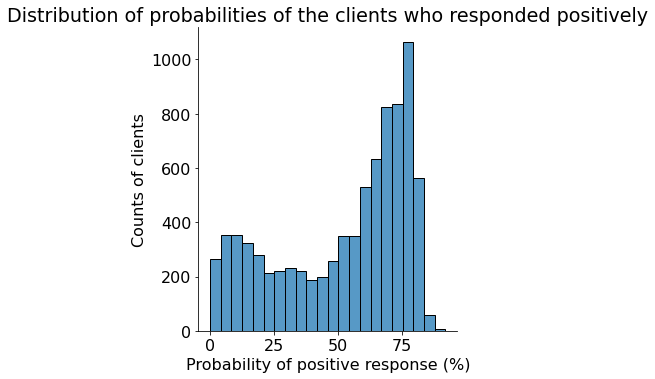

In [137]:
plt.figure(figsize=(5,5))
sns.displot(data = scores_test, x = 100*scores_test)
plt.title('Distribution of probabilities of the clients who responded positively')
plt.xlabel('Probability of positive response (%)')
plt.ylabel('Counts of clients')

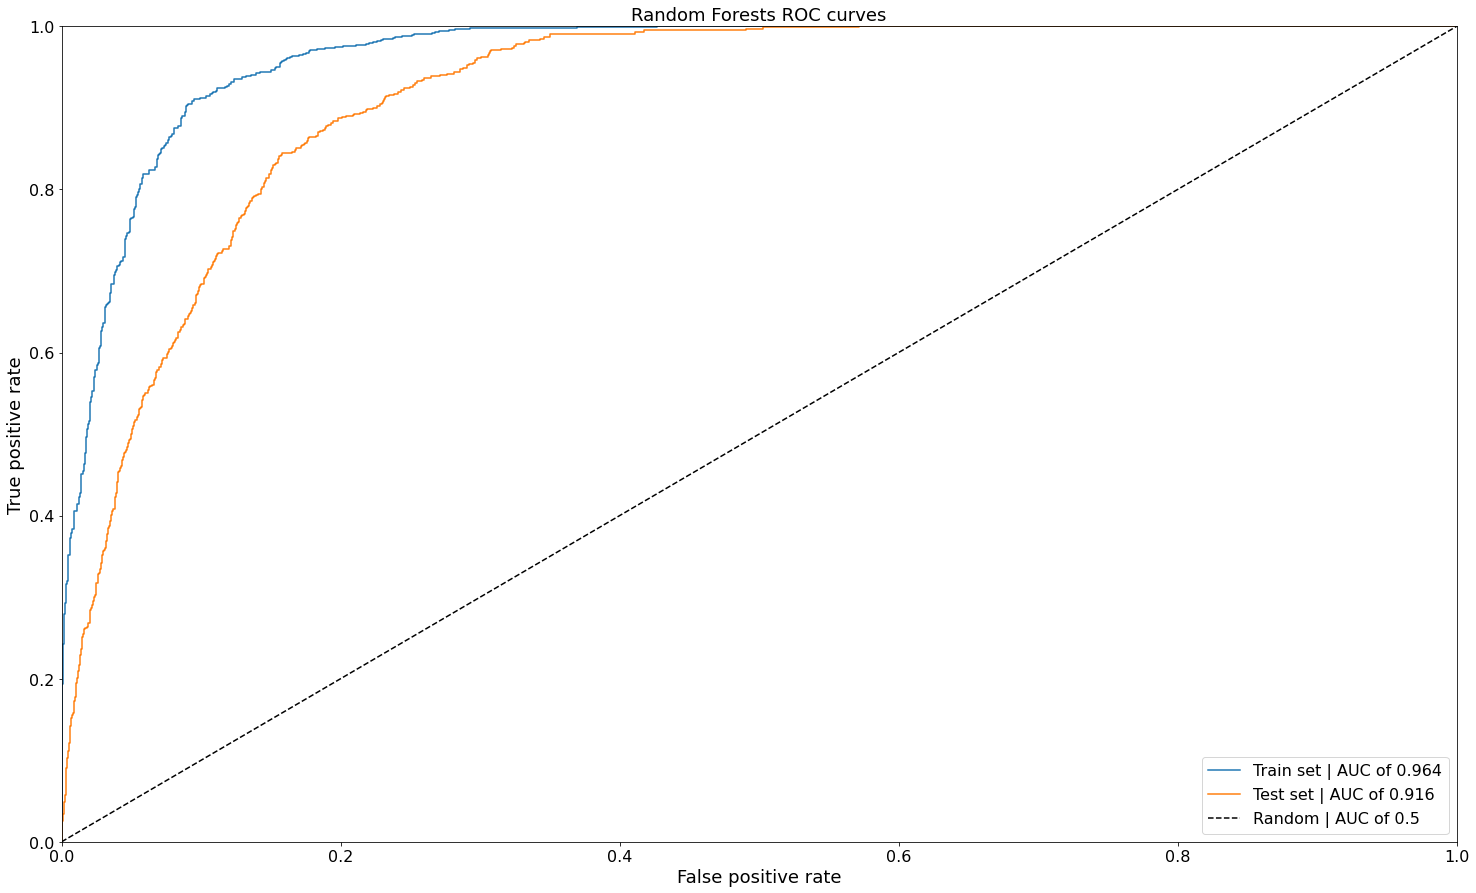

In [138]:
# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Random Forests ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

**Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.**

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_annual, y_test_annual_predicted)
print(cm)

[[2931 1270]
 [ 153 3962]]


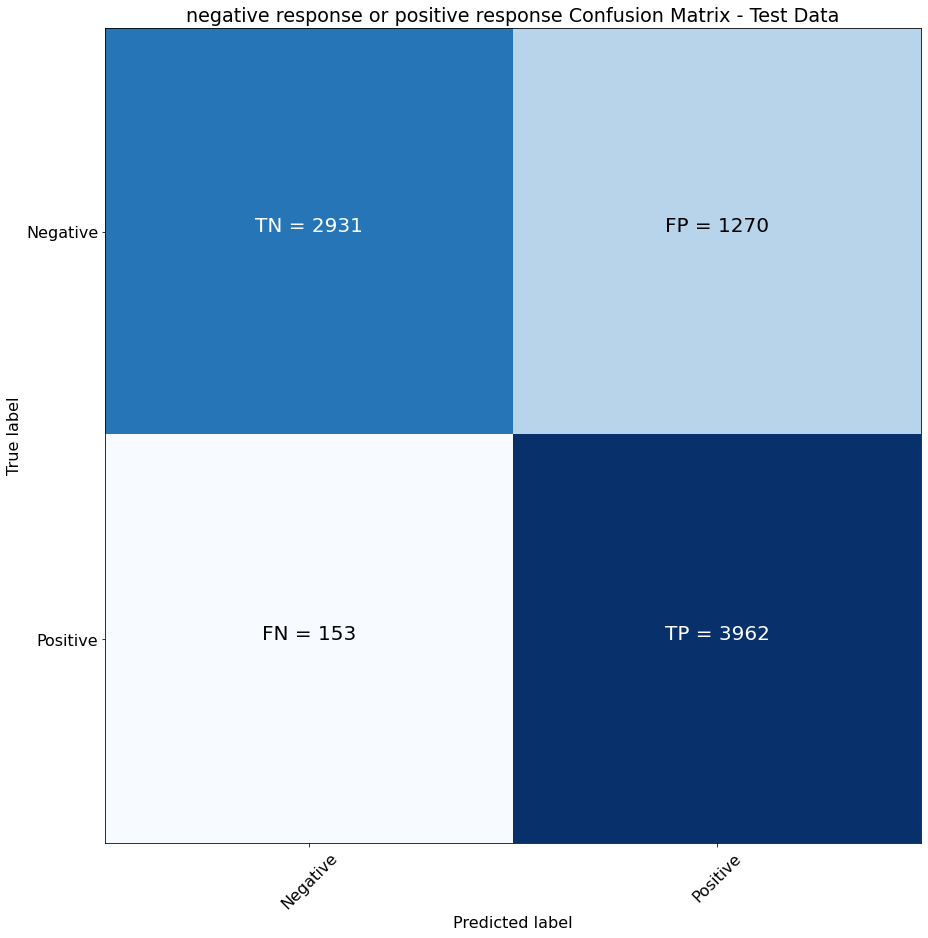

In [140]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('negative response or positive response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [141]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test_annual, y_test_annual_predicted, target_names = ['negative response', 'positive response']))

                   precision    recall  f1-score   support

negative response       0.95      0.70      0.80      4201
positive response       0.76      0.96      0.85      4115

         accuracy                           0.83      8316
        macro avg       0.85      0.83      0.83      8316
     weighted avg       0.85      0.83      0.83      8316



**Plot decision boundary for top 2 features.**

In [142]:
xx, yy = np.mgrid[0:10:1.1111, 0:10:1.1111] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

# np.ones is a table full of ones with 100x75 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((100, 75)) * np.median(X_train_annual, axis=0) 
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

# Then, we replace the 5th and 11th column with the values of the grid
median_inputs[:,0] = grid[:,0]
median_inputs[:,1] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:13,:12] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 0)|(x.name == 1)  else '' for i in x])


(100, 2)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,94.000000,95.000000,44.000000,66.100000,67.400000,68.000000,68.112500,43.000000,46.000000,43.000000
1,0.000000,1.111100,94.000000,95.000000,44.000000,66.100000,67.400000,68.000000,68.112500,43.000000,46.000000,43.000000
2,0.000000,2.222200,94.000000,95.000000,44.000000,66.100000,67.400000,68.000000,68.112500,43.000000,46.000000,43.000000
3,0.000000,3.333300,94.000000,95.000000,44.000000,66.100000,67.400000,68.000000,68.112500,43.000000,46.000000,43.000000
4,0.000000,4.444400,94.000000,95.000000,44.000000,66.100000,67.400000,68.000000,68.112500,43.000000,46.000000,43.000000
5,0.000000,5.555500,94.000000,95.000000,44.000000,66.100000,67.400000,68.000000,68.112500,43.000000,46.000000,43.000000
6,0.000000,6.666600,94.000000,95.000000,44.000000,66.100000,67.400000,68.000000,68.112500,43.000000,46.000000,43.000000
7,0.000000,7.777700,94.000000,95.000000,44.000000,66.100000,67.400000,68.000000,68.112500,43.000000,46.000000,43.000000
8,0.000000,8.888800,94.000000,95.000000,44.000000,66.100000,67.400000,68.000000,68.112500,43.000000,46.000000,43.000000
9,0.000000,9.999900,94.000000,95.000000,44.000000,66.100000,67.400000,68.000000,68.112500,43.000000,46.000000,43.000000


In [143]:
probs = rf_best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[None,
 (0.0, 500.0),
 (0.0, 8.0),
 Text(0.5, 0, 'ann_txn_amt_sum_2014'),
 Text(0, 0.5, 'ann_txn_cnt_2014')]

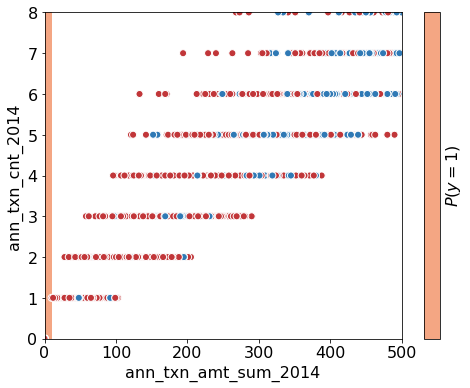

In [144]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 50, cmap="RdBu",
                      vmin=0.5, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual['ann_txn_amt_sum_2014'][50:], X_train_annual['ann_txn_cnt_2014'][50:], c=y_train_annual[50:], s=50, 
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
#plt.annotate('P = 45.0%', xy=(5,0), xycoords='data',horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)
#plt.annotate('P = 12.8%', xy=(-0.8,0.35), xycoords='data', horizontalalignment= 'center', fontsize = 14)
#plt.annotate('P = 27.2%', xy=(-0.8,6.0), xycoords='data', horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)
#plt.annotate('P = 55.1%', xy=(6.0,3.0), xycoords='data', horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)
#plt.annotate('P = 27.2%', xy=(7.0,4.5), xycoords='data', horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)

ax.set(aspect="auto",
       xlim=(0, 500), ylim=(0, 8),
       xlabel="ann_txn_amt_sum_2014", ylabel="ann_txn_cnt_2014")

### Random Forests for Monthly features

**1. Separate the inputs X and the output y in two data frames.**

In [145]:
X2 = monthly_features_outputs.drop(['response','CLNT_NO','ME_DT'],axis=1)
y2 = monthly_features_outputs['response']

In [146]:
y2.value_counts()

0    293139
1     30409
Name: response, dtype: int64

**Undersampling the data to balance the data set**

In [147]:
!pip install imblearn  
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(sampling_strategy = 'all')
X2,y2 = under_sample.fit_resample(X2,y2)
y2 = pd.Series(y2)
y2.value_counts()

0    30409
1    30409
Name: response, dtype: int64

**2. Split the data in train and test set. Use a test size value of 2/3 and set the random state
equal to 1147 for consistency (i.e. the course code value). Use the following names for
consistency.**

In [148]:
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X2, y2, test_size=2/3, random_state=1147)
X_test_monthly.shape

(40546, 28)

### Optimizing parameters in Random forests

We have to optimize 3 parametrs in Random forests which are

1) depth
2) n_estimators
3) max_features

**Optimizing depth**

In [149]:
depths_for_RF = list(range(1, 15))

In [150]:
Train_Error_RF = np.zeros(shape=(len(depths_for_RF),1))
Test_Error_RF = np.zeros(shape=(len(depths_for_RF),1))

In [151]:
count = -1
for depth in depths_for_RF:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    random_forest_mdl = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=1147)
    # Fit the model
    random_forest_mdl.fit(X_train_monthly, np.ravel(y_train_monthly))
    Train_Error_RF[count,0] = random_forest_mdl.score(X_train_monthly, np.ravel(y_train_monthly))
    Test_Error_RF[count,0]  = random_forest_mdl.score(X_test_monthly, np.ravel(y_test_monthly))  

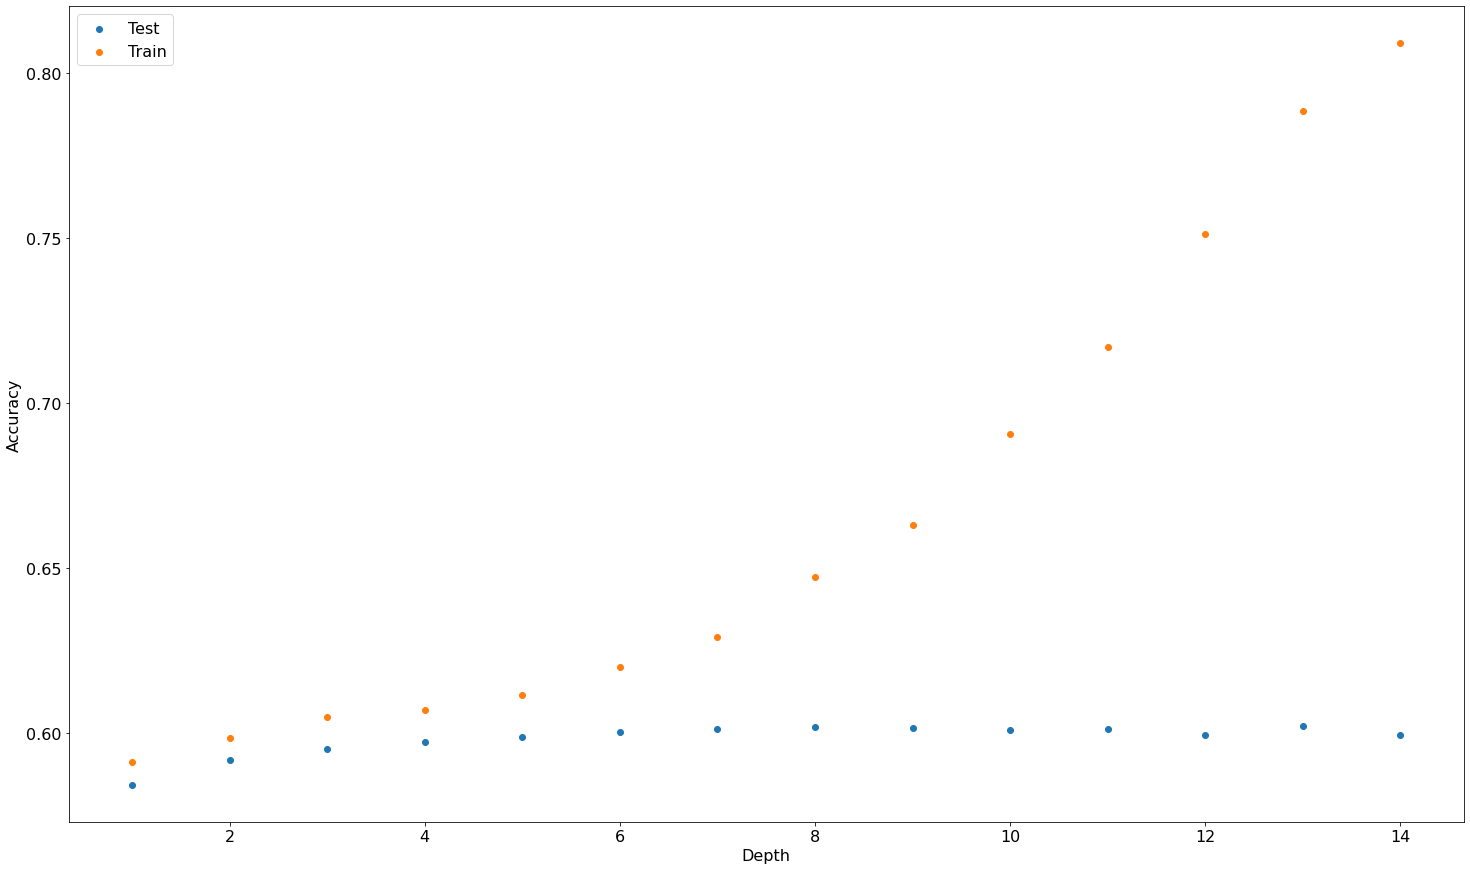

In [152]:
plt.scatter(depths_for_RF, Test_Error_RF, label='Test')
plt.scatter(depths_for_RF, Train_Error_RF, label='Train')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Choosing the Depth as 6 since the data plateaus after 6

**Optimizing n_estimators**

In [153]:
number_of_estimators = list(range(1, 51))

In [154]:
Train_Error_RF = np.zeros(shape=(len(number_of_estimators),1))
Test_Error_RF = np.zeros(shape=(len(number_of_estimators),1))

In [155]:
count = -1
for n_estimators in number_of_estimators:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    random_forest_mdl = RandomForestClassifier(n_estimators=n_estimators, max_depth=6, random_state=1147)
    # Fit the model
    random_forest_mdl.fit(X_train_monthly, np.ravel(y_train_monthly))
    Train_Error_RF[count,0] = random_forest_mdl.score(X_train_monthly, np.ravel(y_train_monthly))
    Test_Error_RF[count,0]  = random_forest_mdl.score(X_test_monthly, np.ravel(y_test_monthly))  

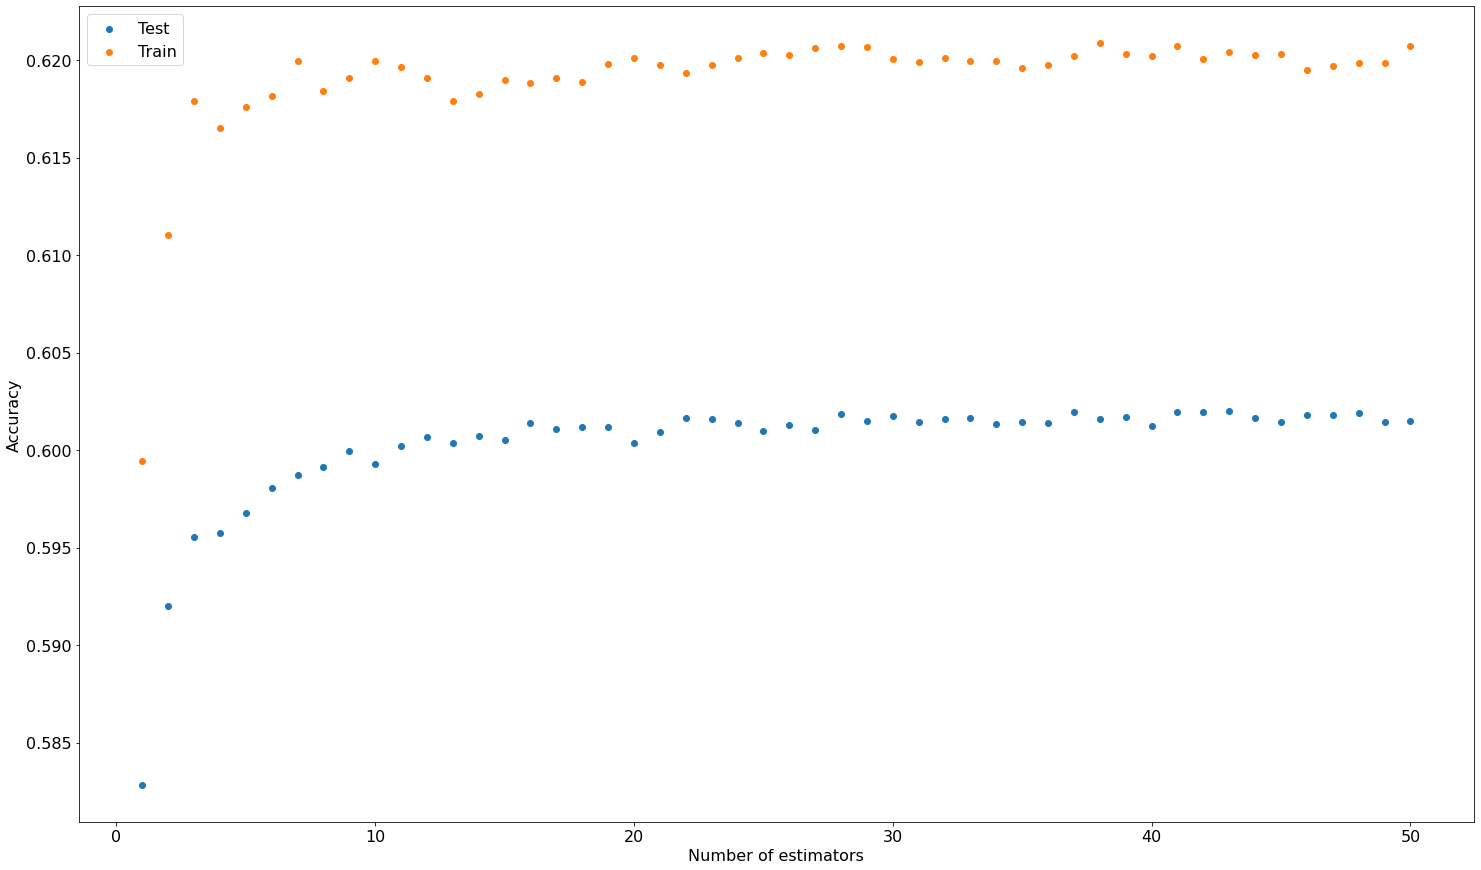

In [156]:
plt.scatter(number_of_estimators, Test_Error_RF, label='Test')
plt.scatter(number_of_estimators, Train_Error_RF, label='Train')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The number of estimators can be chosen anywhere between 15 to 50 since the data stabilizes after 15.

Let us consider the number of estimators to be 20

**Optimizing max_features**

In [157]:
max_features_list = list(range(1, 10))

In [158]:
Train_Error_RF = np.zeros(shape=(len(max_features_list),1))
Test_Error_RF = np.zeros(shape=(len(max_features_list),1))

In [159]:
count = -1
for max_features in max_features_list:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    random_forest_mdl = RandomForestClassifier(n_estimators=20, max_depth=6, max_features = max_features, random_state=1147)
    # Fit the model
    random_forest_mdl.fit(X_train_monthly, np.ravel(y_train_monthly))
    Train_Error_RF[count,0] = random_forest_mdl.score(X_train_monthly, np.ravel(y_train_monthly))
    Test_Error_RF[count,0]  = random_forest_mdl.score(X_test_monthly, np.ravel(y_test_monthly))  

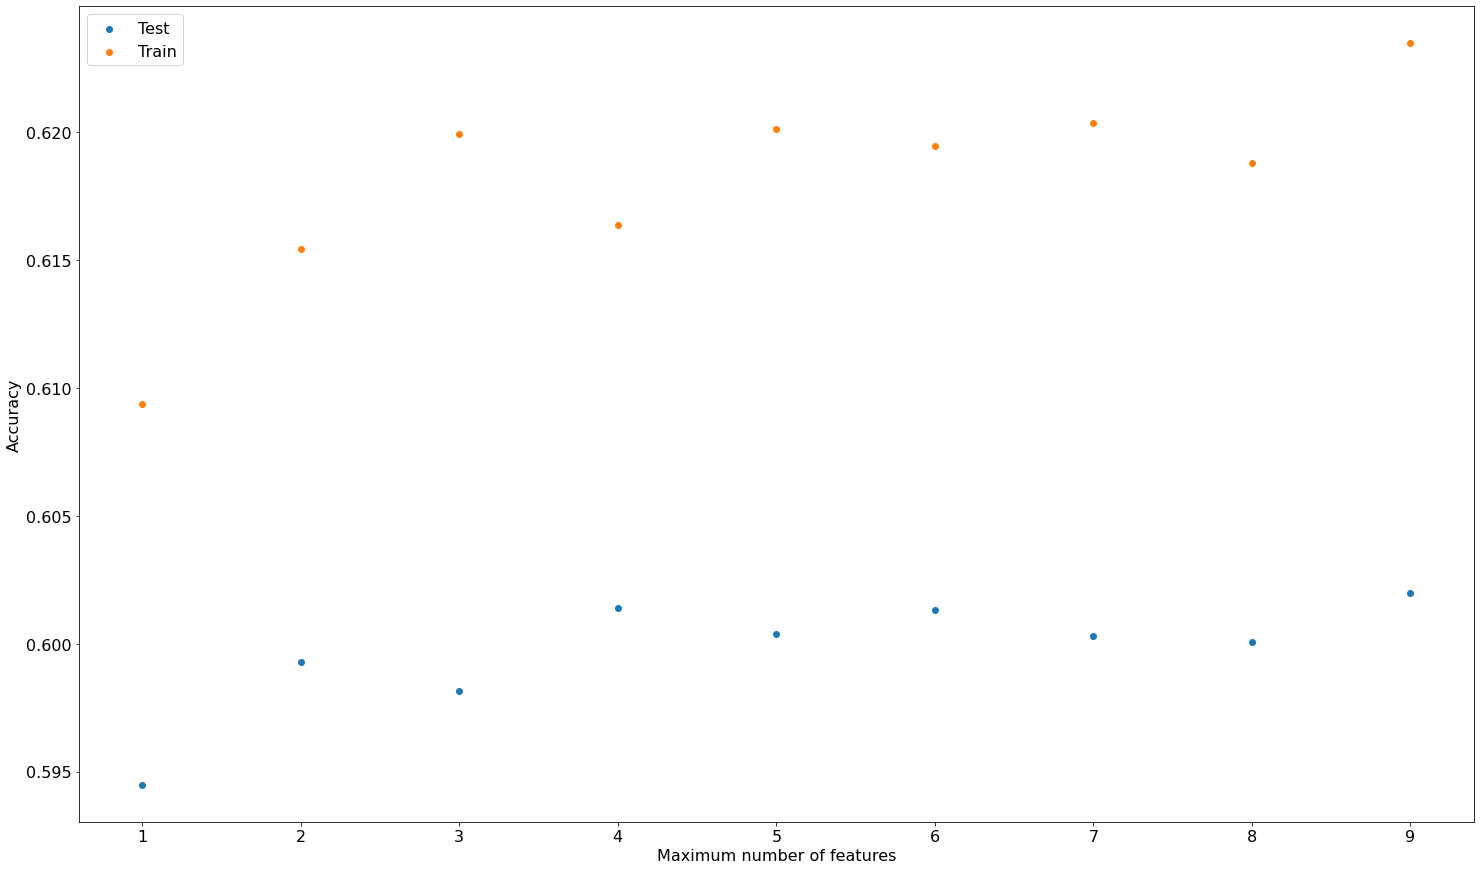

In [160]:
plt.scatter(max_features_list, Test_Error_RF, label='Test')
plt.scatter(max_features_list, Train_Error_RF, label='Train')
plt.xlabel('Maximum number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Typically there is not a clear trend with max_features

### Re-create the optimal Random Forest

In [161]:
best_RF = RandomForestClassifier(n_estimators=20, max_depth=6, random_state=1147)

In [162]:
# Fit the model
best_RF.fit(X_train_monthly, np.ravel(y_train_monthly))
Train_Error_RF = best_RF.score(X_train_monthly, y_train_monthly)
Test_Error_RF = best_RF.score(X_test_monthly, y_test_monthly)

print('Train Mean Accuracy:', round(Train_Error_RF,2))
print('Test Mean Accuracy:', round(Test_Error_RF,2))

Train Mean Accuracy: 0.62
Test Mean Accuracy: 0.6


**Plot coeffcient values or feature importance.**

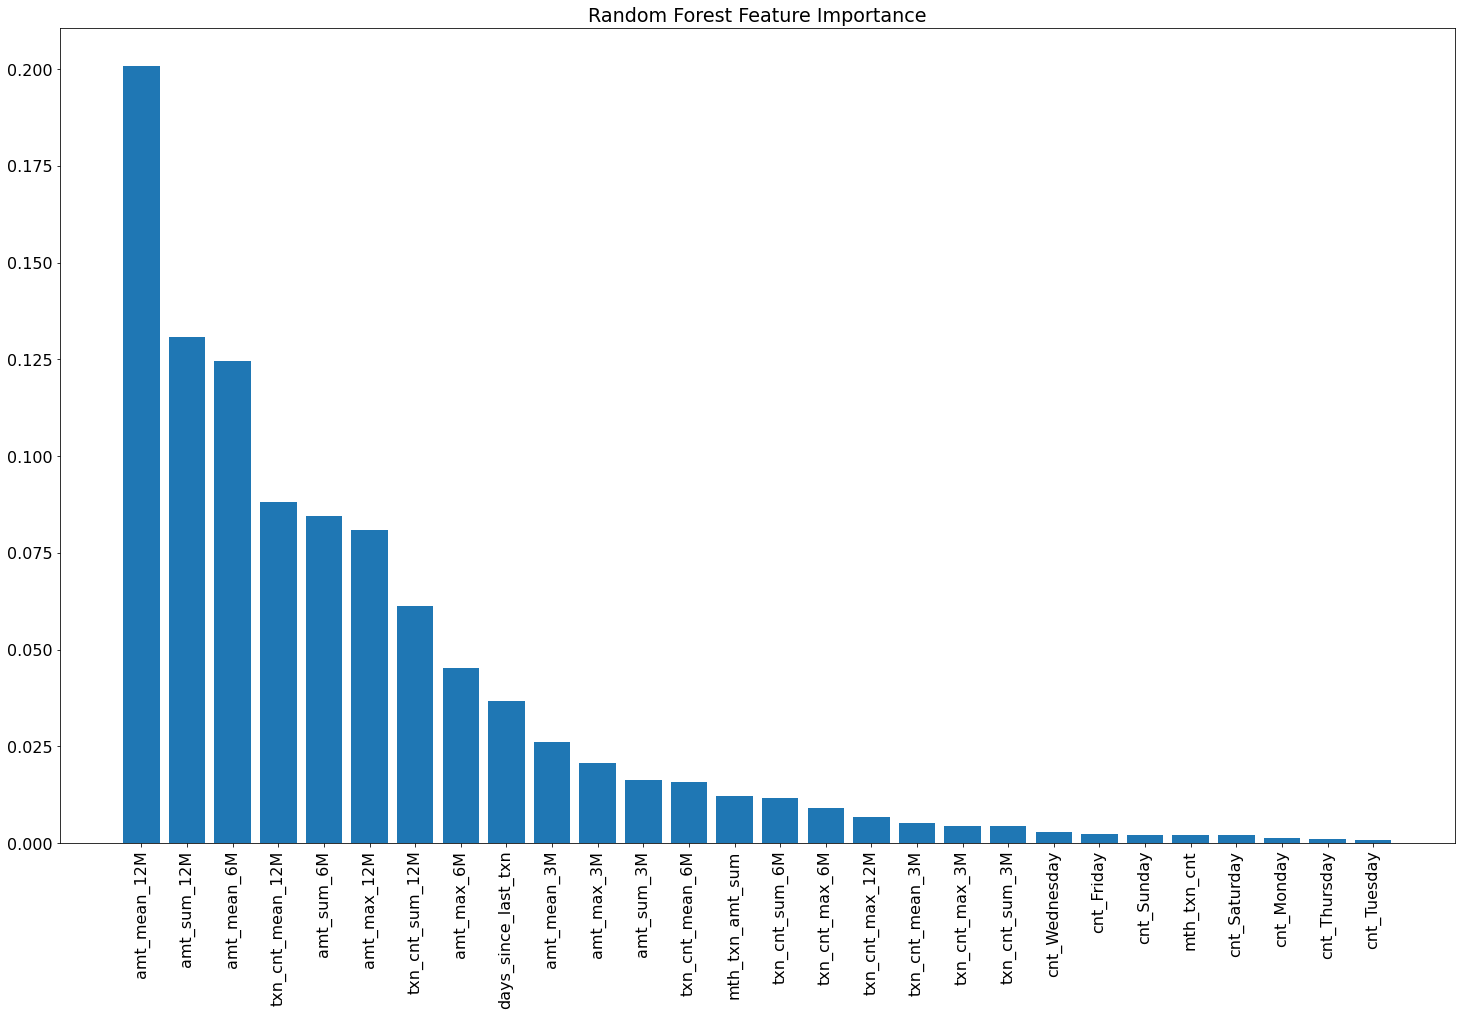

In [163]:
# Calculate feature importances
importances = best_RF.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X2.columns [i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Random Forest Feature Importance")
# Add bars
plt.bar(range(X2.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X2.shape[1]), names, rotation=90)
plt.show()

In [164]:
# Define and fit
estimator      = RandomForestClassifier(n_estimators=20, max_depth=6, random_state=1147) 
rf_best_model = estimator.fit(X_train_monthly, y_train_monthly)
# Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
scores_train = rf_best_model.predict_proba(X_train_monthly)[:,1] 
scores_test  = rf_best_model.predict_proba(X_test_monthly)[:,1]  
# Predict the class of test set
y_test_monthly_predicted = rf_best_model.predict(X_test_monthly)
# Calculate accuracy at every iteration and append
accuracy = 100*accuracy_score(y_test_monthly, y_test_monthly_predicted, normalize = True)
# ROC Calc Train set 
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# Calculate the AUCs
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

### Plot the probabilities distribution and the ROC curves.

Text(-1.8449999999999989, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

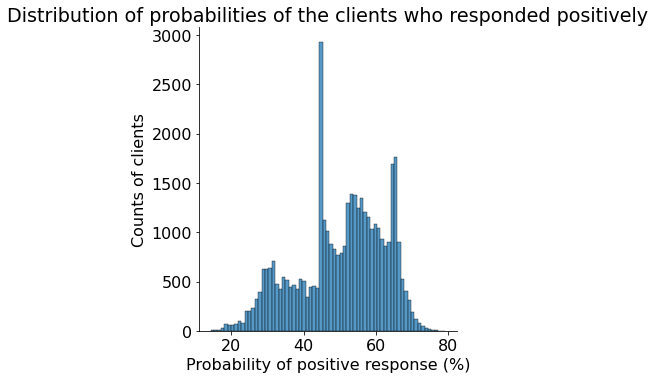

In [165]:
plt.figure(figsize=(5,5))
sns.displot(data = scores_test, x = 100*scores_test)
plt.title('Distribution of probabilities of the clients who responded positively')
plt.xlabel('Probability of positive response (%)')
plt.ylabel('Counts of clients')

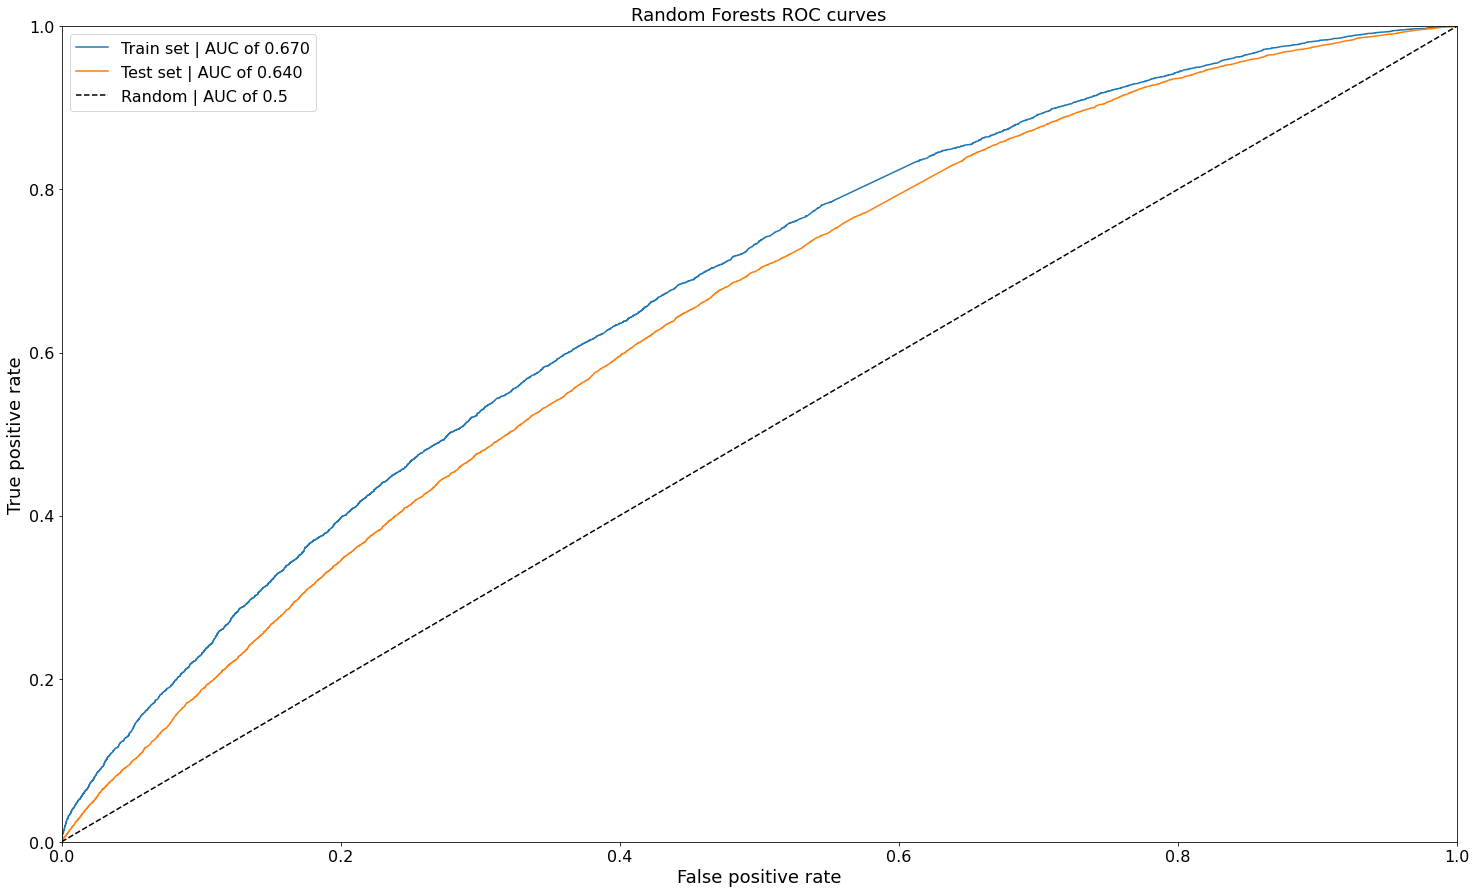

In [166]:
# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Random Forests ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [167]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_monthly, y_test_monthly_predicted)
print(cm)

[[11045  9269]
 [ 6934 13298]]


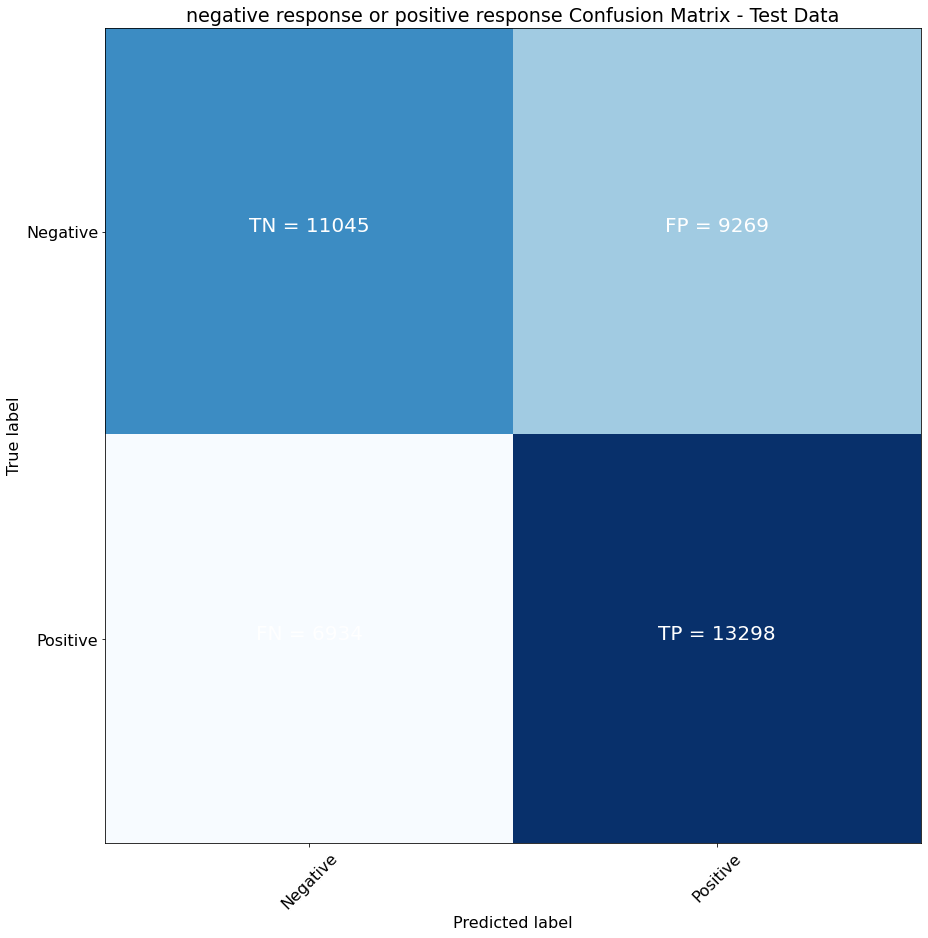

In [168]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('negative response or positive response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [169]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test_monthly, y_test_monthly_predicted, target_names = ['negative response', 'positive response']))

                   precision    recall  f1-score   support

negative response       0.61      0.54      0.58     20314
positive response       0.59      0.66      0.62     20232

         accuracy                           0.60     40546
        macro avg       0.60      0.60      0.60     40546
     weighted avg       0.60      0.60      0.60     40546



**Plot decision boundary for top 2 features.**

In [170]:
xx, yy = np.mgrid[0:10:1.1111, 0:10:1.1111] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

# np.ones is a table full of ones with 100x28 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly, axis=0) 
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

# Then, we replace the 5th and 11th column with the values of the grid
median_inputs[:,0] = grid[:,0]
median_inputs[:,1] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:13,:12] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 0)|(x.name == 1)  else '' for i in x])

(100, 2)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,68.000000,22.666667,62.000000,1.000000,0.333333,1.000000,138.000000,23.000000,84.000000,2.000000
1,0.000000,1.111100,68.000000,22.666667,62.000000,1.000000,0.333333,1.000000,138.000000,23.000000,84.000000,2.000000
2,0.000000,2.222200,68.000000,22.666667,62.000000,1.000000,0.333333,1.000000,138.000000,23.000000,84.000000,2.000000
3,0.000000,3.333300,68.000000,22.666667,62.000000,1.000000,0.333333,1.000000,138.000000,23.000000,84.000000,2.000000
4,0.000000,4.444400,68.000000,22.666667,62.000000,1.000000,0.333333,1.000000,138.000000,23.000000,84.000000,2.000000
5,0.000000,5.555500,68.000000,22.666667,62.000000,1.000000,0.333333,1.000000,138.000000,23.000000,84.000000,2.000000
6,0.000000,6.666600,68.000000,22.666667,62.000000,1.000000,0.333333,1.000000,138.000000,23.000000,84.000000,2.000000
7,0.000000,7.777700,68.000000,22.666667,62.000000,1.000000,0.333333,1.000000,138.000000,23.000000,84.000000,2.000000
8,0.000000,8.888800,68.000000,22.666667,62.000000,1.000000,0.333333,1.000000,138.000000,23.000000,84.000000,2.000000
9,0.000000,9.999900,68.000000,22.666667,62.000000,1.000000,0.333333,1.000000,138.000000,23.000000,84.000000,2.000000


In [171]:
probs = rf_best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[None,
 (0.0, 10.0),
 (10.0, 100.0),
 Text(0.5, 0, 'amt_mean_12M'),
 Text(0, 0.5, 'amt_sum_12M')]

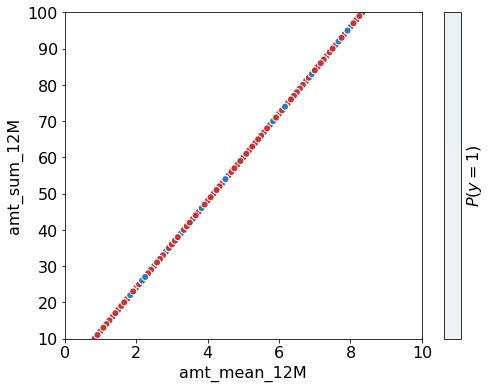

In [172]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 50, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly['amt_mean_12M'][50:], X_train_monthly['amt_sum_12M'][50:], c=y_train_monthly[50:], s=50, 
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
#plt.annotate('P = 45.0%', xy=(5,0), xycoords='data',horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)
#plt.annotate('P = 12.8%', xy=(-0.8,0.35), xycoords='data', horizontalalignment= 'center', fontsize = 14)
#plt.annotate('P = 27.2%', xy=(-0.8,6.0), xycoords='data', horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)
#plt.annotate('P = 55.1%', xy=(6.0,3.0), xycoords='data', horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)
#plt.annotate('P = 27.2%', xy=(7.0,4.5), xycoords='data', horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)

ax.set(aspect="auto",
       xlim=(0, 10), ylim=(10, 100),
       xlabel="amt_mean_12M", ylabel="amt_sum_12M")

# 1.3 Comparison of methods

### Logistic Regression using L1 regularization Results

| Step NO. | Topic | annual_features_outputs  | monthly_features_outputs |
| ------------- | ------------- | ----- | -----|
| 5 | Coefficient values or feature of importance  |**Parameters:** penalty='l1' C=0.1 solver='liblinear' class_weight='balanced'<br>considering C = 0.1 since more coefficients are reduced to zero <br> **The top 2 features are:** ann_txn_cnt_2014, ann_txn_amt_sum_2013  |**Parameters:** penalty='l1' C=0.01 solver='liblinear' class_weight='balanced' considering C = 0.01 since more coefficients are reduced to zero <br> **The top 2 features are:** amt_mean_12M, txn_cnt_mean_12M |
| 6 | probability distribution for test set  | Frequency of unique values: 0: 3114, 1: 1476 <br>From the plot we can infer that majority of the clients gave a negative response to the campaign.<br> Only 40 clients gave 100 percent positive response. |  Frequency of unique values: 0: 134287, 1: 81412 <br>From the plot we can infer that majority of the clients gave a negative response to the campaign.<br> |
| 7  | confusion matrix, ROC curves of train/test,<br> precision/recall   | **Confuion matrix:**<br> TN: 2963 TP: 300 FN: 151 FP: 1176 <br> In this model, 1176 clients were predicted to have given a positive response but they were actually negative.<br>151 clients were predicted to have given a negative response but they actually turned out to be positve.<br> These 151 clients if not predicted correclty could damage the reputation of the campaign since they gave a positive response.<br> **Precision:**<br> Negative response: 0.95  Positive response: 0.20 <br> **Recall**<br>Negative response: 0.72  Positive response: 0.67 <br>**ROC curves for train/test set:**<br> Train set AUC: 0.812  Test set AUC: 0.758   | **Confuion matrix:**<br> TN: 124841 TP: 10856 FN: 9446 FP: 70556 <br>  In this model, 70556 responses were a positive response but they were actually negative.<br>9446 responses were predicted to be negative but they actually turned out to be positve.<br> These 9446 responses if not predicted correclty could damage the reputation of the campaign since they gave a positive response.<br>**Precision:**<br> Negative response: 0.93  Positive response: 0.13 <br> **Recall**<br>Negative response: 0.64  Positive response: 0.53 <br>**ROC curves for train/test set:**<br> Train set AUC: 0.630  Test set AUC: 0.627 |
| 8 | Decision Boundary | The decision boundary for top 2 features such as ann_txn_cnt_2014, ann_txn_amt_sum_2013 was plotted | The decision boundary for top 2 features such as amt_mean_12M, txn_cnt_max_12M was plotted |


### Decision trees Results

| Step NO. | Topic | annual_features_outputs  | monthly_features_outputs |
| ------------- | ------------- | ----- | -----|
| 5  | Coefficient values or feature of importance  | **Parameters** (optimizing for different depths)<br>max_depth=3, random_state=0, class_weight='balanced', ccp_alpha=0.001<br>Considering the depth as 3 from the graph between Accuracy and depth.<br>**The top 2 features are:** ann_txn_amt_sum_2014, ann_txn_amt_sum_2013  | **Parameters** (optimizing for different depths)<br>max_depth=3, random_state=0, class_weight='balanced', ccp_alpha=0.001<br>Considering the depth as 3 from the graph between Accuracy and depth.<br>**The top 2 features are:** amt_mean_12M, amt_max_12M|
| 6  | Probability distribution for test set | Frequency of unique values: 0: 3088, 1: 1502<br>The graph depicts 7 buckets with 2.08, 20.92, 23.94, 37.29, 41.98, 66.86, 74.05, 74.95% probability to positive response.<br>Cummulatively, majority of the clients gave a negative response to the campaign.  | Frequency of unique values: 0: 130395, 1: 85304<br> The graph depicts 8 buckets with 20.98, 26.04, 36.38, 42.39, 49.59, 52.84, 58.47, 64.43% probability to positive response.<br> Cummulatively, more than half of the responses were negative  |
| 7 |  confusion matrix, ROC curves of train/test,<br> precision/recall |**Confuion matrix:**<br> TN: 2934 TP: 297 FN: 154 FP: 1205<br>In this model, 1205 clients were predicted to have given a positive response but they were actually negative.<br>154 clients were predicted to have given a negative response but they actually turned out to be positve.<br> These 154 clients if not predicted correclty could damage the reputation of the campaign since they gave a positive response.<br>**Precision:**<br> Negative response: 0.95  Positive response: 0.20 <br> **Recall**<br>Negative response: 0.71  Positive response: 0.66 <br>**ROC curves for train/test set:**<br> Train set AUC: 0.784  Test set AUC: 0.742  | **Confuion matrix:**<br> TN: 121456 TP: 11363 FN: 8939 FP: 73941<br>In this model, 73941 responses were a positive response but they were actually negative.<br>8939 responses were predicted to be negative but they actually turned out to be positve.<br> These 8939 responses if not predicted correclty could damage the reputation of the campaign since its a considerable high value of a positive response.<br>**Precision:**<br> Negative response: 0.93  Positive response: 0.13 <br> **Recall**<br>Negative response: 0.62  Positive response: 0.56 <br>**ROC curves for train/test set:**<br> Train set AUC: 0.636  Test set AUC: 0.631 |
| 8 | Decision Boundary | The decision boundary for top 2 features such as ann_txn_amt_sum_2014, ann_txn_amt_sum_2013 was plotted |  The decision boundary for top 2 features such as amt_mean_12M, txn_cnt_max_12M was plotted |

### Random Forests Results

| Step NO. | Topic | annual_features_outputs  | monthly_features_outputs |
| ------------- | ------------- | ----- | -----|
| 5  | Coefficient values or feature of importance  | Note: To balance the data, oversampling was done.<br> **Parameters**<br> We have to optimize 3 parametrs in Random forests which are<br>1) depth <br>2) n_estimators <br>3) max_features <br> **optimizing depth:** <br>Choosing the Depth as 8 from the grapgh Accuracy vs Depth since the data plateaus after 8<br>**Optimizing n_estimators**<br> The number of estimators can be chosen anywhere between 10 to 50 since the data stabilizes after 10. Let's consider 25<br> **Optimizing max_features** <br> Typically there is not a clear trend with max_features <br>best_RF = RandomForestClassifier(n_estimators=25, max_depth=8, random_state=1147)<br> **The top 2 features are:** ann_txn_amt_sum_2014, ann_txn_cnt_2014  | Note: To balance the data, undersampling was done.<br> **Parameters**<br> We have to optimize 3 parametrs in Random forests which are<br>1) depth <br>2) n_estimators <br>3) max_features <br> **optimizing depth:** <br>Choosing the Depth as 6 from the grapgh Accuracy vs Depth since the data plateaus after 6<br>**Optimizing n_estimators**<br> The number of estimators can be chosen anywhere between 15 to 50 since the data stabilizes after 15. Let's consider 20<br> **Optimizing max_features** <br> Typically there is not a clear trend with max_features <br>best_RF = RandomForestClassifier(n_estimators=20, max_depth=6, random_state=1147)<br> **The top 2 features are:** amt_mean_12M, amt_sum_12M
| 6  | Probability distribution for test set | The model predicts a considerable amount of positive response which makes the model more robust.<br>Cummulatively, majority of the clients gave a negative response to the campaign.  | Majority of the clients responded negatively with a few clients (around 100) who responded positively.<br> The model did not predict positive responses as effective as annual features.  |
| 7 |  confusion matrix, ROC curves of train/test,<br> precision/recall |**Confuion matrix:**<br> TN: 2931 TP: 3962 FN: 153 FP: 1270<br>In this model, 1270 clients were predicted to have given a positive response but they were actually negative.<br>153 clients were predicted to have given a negative response but they actually turned out to be positve.<br> These 153 clients if not predicted accurately could damage the reputation of the campaign since they gave a positive response.<br>**Precision:**<br> Negative response: 0.95  Positive response: 0.76 <br> **Recall**<br>Negative response: 0.70  Positive response: 0.96 <br>**ROC curves for train/test set:**<br> Train set AUC: 0.964  Test set AUC: 0.916  | **Confuion matrix:**<br> TN: 11045 TP: 13298 FN: 6934 FP: 9269<br>In this model, 9269 responses were a positive response but they were actually negative.<br>6934 responses were predicted to be negative but they actually turned out to be positve.<br> These 6934 responses if not predicted correclty could damage the reputation of the campaign since its a considerable high value of positive responses.<br>**Precision:**<br> Negative response: 0.61  Positive response: 0.59 <br> **Recall**<br>Negative response: 0.54  Positive response: 0.66 <br>**ROC curves for train/test set:**<br> Train set AUC: 0.670  Test set AUC: 0.640 |
| 8 | Decision Boundary | The decision boundary for top 2 features such as ann_txn_amt_sum_2014, ann_txn_cnt_2014 was plotted |  The decision boundary for top 2 features such as amt_mean_12M, amt_sum_12M was plotted |

# Conclusion

### Annual features outputs - The best algorithm is Random Forests

The best model always depends on the fact that how many correct and incorrect decisions the model made.<br>
Typically a good model should predict lesser False Negatives and False Positives.<br>
Talking in this perspective, **for Annual features**, the best algorithm is **Random Forests** since it predicted 6893 correct responses taking its accuracy to 0.83 which is the highest when compared to LogReg and Decision trees. <br>
The model is precise in predicting both negative and positive responses<br>
The Precision of this algorithm is 0.76 for Positive response which is the ratio of true Positive to the total of the true Positive and false Positive. This value is highest in Random forests compared to other 2 algorithms.<br>
Instead of looking at the number of false positives the model predicted, recall looks at the number of false negatives that were thrown into the model. The model predicted a recall value of 0.96
By analyzing the ROC curve, I declared that the model performance in Random forest is very good by obtaining an area under the curve of 96.4% of train set and 91.6% of test set. 

### Monthly features outputs - The best algorithm is Random Forests

After obtaining the results, it is noted that Logistic Regression model displayed a higher accuracy in predicting the responses of the clients. With a precision of 0.93, this model predicted nearly 135697 correct responses which is greater than the Decision trees and Random forests.<br>
However, by analyzing the ROC curve, the model performance is not as good as expected.The model has a low performance.<br>
The AUC values are the highest in Random forests compared to other methods which depicts that the model was good in quickly identifying the true positive values.<br>
Random forests is a better model since it has more than 1 hyperparameters to optimize. They are also easy to tune and avoids overfitting compared to other methods.<br>
It performs both feature selection and modelling at the same time. No feature scaling is required.
